<a href="https://colab.research.google.com/github/martin-quinlan/data-science-projects/blob/main/Final_MQ_Learner_Notebook_USL_Fullcode_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unsupervised Learning Project: AllLife Bank Customer Segmentation**

# **Marks: 30**

Welcome to the project on Unsupervised Learning. We will be using **Credit Card Customer Data** for this project.

--------------------------------
## **Context**
-------------------------------

**AllLife Bank wants to focus on its credit card customer base** in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers.

Another insight from the market research was that the customers perceive the support services of the bank poorly. Based on this, the operations team wants to upgrade the service delivery model, to ensure that customers' queries are resolved faster. The head of marketing and the head of delivery, both decide to reach out to the Data Science team for help.


----------------------------
## **Objective**
-----------------------------

**Identify different segments in the existing customer base**, taking into account their spending patterns as well as past interactions with the bank.

--------------------------
## **About the data**
--------------------------

Data is available on customers of the bank with their credit limit, the total number of credit cards the customer has, and different channels through which the customer has contacted the bank for any queries. These different channels include visiting the bank, online, and through a call center.

- **Sl_no** - Customer Serial Number
- **Customer Key** - Customer identification
- **Avg_Credit_Limit**	- Average credit limit (currency is not specified, you can make an assumption around this)
- **Total_Credit_Cards** - Total number of credit cards
- **Total_visits_bank**	- Total bank visits
- **Total_visits_online** - Total online visits
- **Total_calls_made** - Total calls made

## **Importing libraries and overview of the dataset**

**Note:** Please make sure you have installed the sklearn_extra library before running the below cell. If you have not installed the library, please run the below code to install the library:

!pip install scikit-learn-extra

In [ ]:
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.9 MB/s eta 0:00:00


In [ ]:
# Import required libraries
import pandas as pd                  # For data manipulation and analysis
import numpy as np                   # For numerical operations and array manipulation
import matplotlib.pyplot as plt      # For creating static visualisations
import seaborn as sns               # For statistical data visualisation
from sklearn.preprocessing import StandardScaler    # For feature scaling
from sklearn.decomposition import PCA              # For dimensionality reduction
from sklearn.cluster import KMeans                 # For K-means clustering algorithm
from sklearn.mixture import GaussianMixture        # For Gaussian Mixture Model clustering
from sklearn.metrics import adjusted_rand_score    # For comparing clustering results
from sklearn_extra.cluster import KMedoids         # For K-medoids clustering algorithm
from scipy import stats                            # For statistical functions and tests

# Set random seed for reproducibility
np.random.seed(42)                  # Ensures consistent results across multiple runs

# Set seaborn visualisation settings
sns.set_style("darkgrid")           # Sets plot background style with dark grid lines
sns.color_palette("pastel")         # Uses pastel colors for better visualisation contrast

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

### **Loading the data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Applied Data Science Program/Main Modules/Elective Project - DataVis/AllLife Bank Customer Segmentation/Credit+Card+Customer+Data.xlsx')

### **Data Overview**

- Observations
- Sanity checks




In [ ]:
# Basic dataset information
# Display basic information about the dataset
print("\nData Info:\n")          # Print header for dataset information
df.info()                     # Display concise summary of DataFrame: memory usage, column data types, non-null values
print("\nDataset Shape:", df.shape)     # Show dimensions of DataFrame (rows x columns)
print("\nData Types:\n", df.dtypes)     # Display data type of each column (int64, float64, object etc.)
print("\nFirst few rows:\n", df.head()) # Show first 5 rows of DataFrame to preview data structure



Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB

Dataset Shape: (660, 7)

Data Types:
 Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

First few rows:
    Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2  

# Observations

## Dataset Overview
* Total number of records: 660
* Total number of columns: 7
* Memory usage: 36.2 KB

## Column Information
1. **Sl_No** (int64)
   * Sequential numbering
   * Used as index identifier
   * Not relevant for analysis

2. **Customer Key** (int64)
   * Unique customer identifier
   * Range appears to be between 11000-99999
   * Not relevant for analysis

3. **Avg_Credit_Limit** (int64)
   * Shows significant variation (30000 to 100000 in sample)
   * Key financial indicator
   * Important for customer segmentation

4. **Total_Credit_Cards** (int64)
   * Ranges from 2 to 7 cards in sample
   * Indicator of customer engagement
   * Important behavioral metric

5. **Total_visits_bank** (int64)
   * Physical channel usage
   * Binary values visible in sample (0 or 1)
   * Important for channel preference analysis

6. **Total_visits_online** (int64)
   * Digital channel usage
   * Wide range (1 to 12 in sample)
   * Key indicator of digital engagement

7. **Total_calls_made** (int64)
   * Customer service channel usage
   * Ranges from 0 to 9 in sample
   * Important for service interaction analysis

## Key Observations
1. **Data Quality**
   * No null values in any columns
   * All columns are integer type
   * Clean, structured dataset

2. **Analysis Potential**
   * Rich behavioral data across channels (online, physical, calls)
   * Financial information through credit limits
   * Good mix of customer engagement metrics

3. **Preprocessing Requirements**
   * `Sl_No` and `Customer Key` can likely be dropped
   * Scaling needed due to different value ranges
   * All variables are numeric, no encoding needed

## Sample Data Insights
* Varying credit limits (30000 to 100000) suggest different customer segments
* Mixed channel preferences visible (some prefer online, others physical visits)
* Different levels of credit card ownership (2-7 cards) indicate varying customer engagement

In [ ]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


# Observations
- No missing values evident in the data set

In [ ]:
# Check for duplicates in the dataset
print("\nDuplicate Rows:", df.duplicated().sum())           # Count total number of duplicate rows
print("Duplicate Customer Keys:",
      df['Customer Key'].duplicated().sum())               # Count duplicate values in 'Customer Key' column


Duplicate Rows: 0
Duplicate Customer Keys: 5


# Observations
- 5 duplicate Customer Keys evident in the data set

## **Data Preprocessing and Exploratory Data Analysis**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.
- Check and drop the duplicate customer keys
- Drop the variables that are not required for the analysis
- Check duplicate rows and remove them.


**Questions:**

1. How does the distribution and outliers look for each variable in the data?
2. How are the variables correlated with each other?

#### **Check the summary Statistics**

In [ ]:
# Generate summary statistics for numeric columns
print("\nDescriptive Statistics:\n",
      df.describe().T)                # Calculate and display statistical measures for each numeric column
                                     # .describe() provides: count, mean, std, min, 25%, 50%, 75%, max
                                     # .T transposes output for better readability (columns become rows)


Descriptive Statistics:
                      count          mean           std      min       25%  \
Sl_No                660.0    330.500000    190.669872      1.0    165.75   
Customer Key         660.0  55141.443939  25627.772200  11265.0  33825.25   
Avg_Credit_Limit     660.0  34574.242424  37625.487804   3000.0  10000.00   
Total_Credit_Cards   660.0      4.706061      2.167835      1.0      3.00   
Total_visits_bank    660.0      2.403030      1.631813      0.0      1.00   
Total_visits_online  660.0      2.606061      2.935724      0.0      1.00   
Total_calls_made     660.0      3.583333      2.865317      0.0      1.00   

                         50%       75%       max  
Sl_No                  330.5    495.25     660.0  
Customer Key         53874.5  77202.50   99843.0  
Avg_Credit_Limit     18000.0  48000.00  200000.0  
Total_Credit_Cards       5.0      6.00      10.0  
Total_visits_bank        2.0      4.00       5.0  
Total_visits_online      2.0      4.00      15.0  


# Observations

## Credit Behaviour Metrics

### Average Credit Limit
* **Range**: 3,000 to 200,000
* **Mean**: 34,574
* **Median**: 18,000
* **Observations**:
  * Wide spread in credit limits (std: 37,625)
  * Right-skewed distribution (mean > median)
  * 75% of customers have credit limit ≤ 48,000
  * Significant gap between median and maximum suggests premium customer segment

### Total Credit Cards
* **Range**: 1 to 10 cards
* **Mean**: 4.71 cards
* **Median**: 5 cards
* **Observations**:
  * Most customers have multiple cards
  * Relatively symmetric distribution (mean ≈ median)
  * 75% of customers have 6 or fewer cards
  * Standard deviation of 2.17 indicates moderate variation

## Channel Usage Metrics

### Bank Visits
* **Range**: 0 to 5 visits
* **Mean**: 2.40 visits
* **Median**: 2 visits
* **Observations**:
  * Moderate physical branch usage
  * 25% of customers make 1 or fewer visits
  * 75% make 4 or fewer visits
  * Fairly symmetric distribution

### Online Visits
* **Range**: 0 to 15 visits
* **Mean**: 2.61 visits
* **Median**: 2 visits
* **Observations**:
  * Wide range in online engagement
  * Right-skewed distribution
  * Higher maximum than physical visits
  * Some customers are heavy digital users (outliers)

### Call Center Usage
* **Range**: 0 to 10 calls
* **Mean**: 3.58 calls
* **Median**: 3 calls
* **Observations**:
  * Moderate call center usage
  * Relatively symmetric distribution
  * 75% of customers make 5 or fewer calls
  * Standard deviation of 2.87 indicates significant variation

## Key Insights
1. **Customer Segmentation**:
   * Clear evidence of different customer tiers based on credit limits
   * Diverse credit card ownership patterns
   * Varied channel preferences

2. **Channel Preferences**:
   * Online channel shows highest maximum usage (15)
   * Physical visits are more constrained (max 5)
   * Call center usage shows moderate to high engagement

3. **Distribution Patterns**:
   * Credit limit shows strongest right skew
   * Channel usage metrics are more symmetrically distributed
   * Credit card ownership is fairly normally distributed

4. **Variability**:
   * Highest relative variability in credit limits
   * Moderate variability in channel usage
   * Most consistent in credit card ownership

# **Check and drop the duplicate customer keys**

In [ ]:
# Display count of duplicate Customer Keys in the dataset
print("Number of duplicate Customer Keys:",
      df['Customer Key'].duplicated().sum())    # Select 'Customer Key' column and check for duplicates
                                               # .duplicated() flags subsequent occurrences of values as True
                                               # .sum() counts total number of True values (duplicates)

Number of duplicate Customer Keys: 5


In [ ]:
# Remove duplicate Customer Keys and reset DataFrame
df = df.drop_duplicates(
    subset='Customer Key',           # Specify column to check for duplicates
    keep='first'                     # Keep first occurrence of duplicate Customer Keys, drop subsequent ones
    ).reset_index(drop=True)         # Reset index numbers to be sequential after removing duplicates
                                    # drop=True prevents old index becoming new column
                                    # Assigns new index 0,1,2... to remaining rows
                                    # Original df is overwritten with new version (no duplicates)

In [ ]:
# Confirm successful removal of duplicate Customer Keys
print("Number of duplicate Customer Keys after removal:",
      df['Customer Key'].duplicated().sum())    # Verify no duplicates remain in Customer Key column
                                               # Should return 0 if duplicate removal was successful
print("Final dataset shape:",
      df.shape)                                # Display updated dimensions of DataFrame

Number of duplicate Customer Keys after removal: 0
Final dataset shape: (655, 7)


# **Drop the variables that are not required for the analysis**

Looking at the dataset columns:

* `Sl_No` - This is just a row index number
* `Customer Key` - This is just a unique identifier for each customer
* The remaining variables (`Avg_Credit_Limit`, `Total_Credit_Cards`, `Total_visits_bank`, `Total_visits_online`, `Total_calls_made`) are all meaningful for customer segmentation analysis as they represent:

  * Credit/financial behavior (`Avg_Credit_Limit`, `Total_Credit_Cards`)
  * Channel preferences and interaction patterns (`Total_visits_bank`, `Total_visits_online`, `Total_calls_made`)

We're keeping all the behavioural and transactional variables as they're necessary for identifying meaningful customer segments.

In [ ]:
# Show original columns
print("Original columns:", df.columns.tolist())

Original columns: ['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']


In [ ]:
# Drop unnecessary columns
df = df.drop(['Sl_No', 'Customer Key'], axis=1)
# Show remaining columns
print("\nRemaining columns:", df.columns.tolist())
print("\nDataset shape:", df.shape)


Remaining columns: ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

Dataset shape: (655, 5)


# Observations
- The above shows the new shape of the data set after dropping duplicate `Customer Key` related rows and subsequently dropping the `Sl_No` and `Customer Key` variables all together.

# **Check duplicate rows and remove them.**

In [ ]:
# Check for duplicate rows in DataFrame
print("Shape before removing duplicates:",
      df.shape)                                # Display current dataset dimensions
print("\nNumber of duplicate rows:",
      df.duplicated().sum())                   # Count total number of complete row duplicates
                                              # Checks all columns for identical values

Shape before removing duplicates: (655, 5)

Number of duplicate rows: 11


In [ ]:
# Display duplicate rows if they exist
if df.duplicated().sum() > 0:                 # Check if any duplicates were found
    print("\nDuplicate rows found:")
    print(df[df.duplicated(keep=False)]       # keep=False marks all duplicates, including first occurrence
        .sort_values(by='Avg_Credit_Limit'))  # Sort output by credit limit for better readability


Duplicate rows found:
     Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
310              5000                   4                  5   
394              5000                   4                  5   
56               6000                   1                  0   
175              6000                   1                  0   
384              8000                   7                  4   
333              8000                   7                  4   
17               8000                   2                  0   
215              8000                   4                  0   
162              8000                   2                  0   
29               8000                   4                  0   
252              9000                   4                  5   
324              9000                   4                  5   
257             10000                   6                  4   
295             10000                   6                  4   
320             1

# Observations
The following code shows that there are 5 duplicate Customer keys and no Duplicate Rows:
```
print("\nDuplicate Rows:", df.duplicated().sum())
print("Duplicate Customer Keys:", df['Customer Key'].duplicated().sum())

Duplicate Rows: 0
Duplicate Customer Keys: 5
```
After dropping duplicated Customer Keys and running the folowing code, we can see that 11 duplicate rows are identified.
```
print("Shape before removing duplicates:", df.shape)
print("\nNumber of duplicate rows:", df.duplicated().sum())

Shape before removing duplicates: (655, 5)

Number of duplicate rows: 11
```
This code verifies the duplicate Customer Keys being removed:
```
print("Number of duplicate Customer Keys after removal:", df['Customer Key'].duplicated().sum())
print("Final dataset shape:", df.shape)

Number of duplicate Customer Keys after removal: 0
Final dataset shape: (655, 5)
```
The 11 duplicate row combinations flagged above are associated with unique customers. This would be legitimate credit card data and would be incorrect to drop. This data will be retained for the next stages of the analysis.



# **Univariate Analysis**

**Combined Histogram and Box Plots**

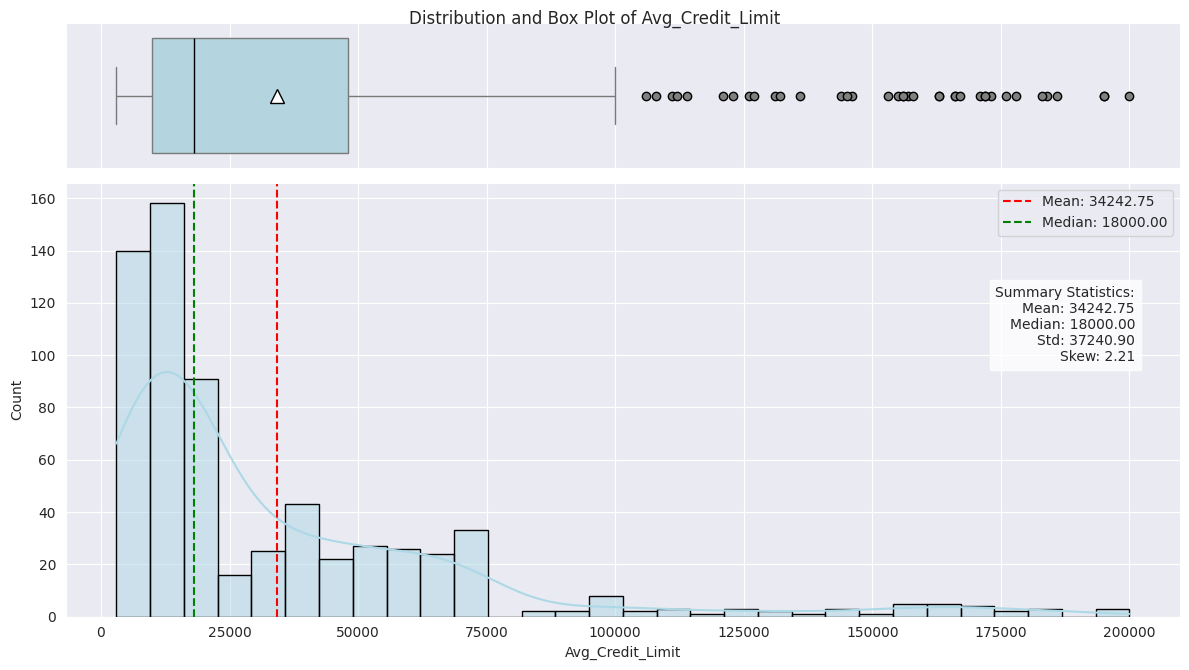

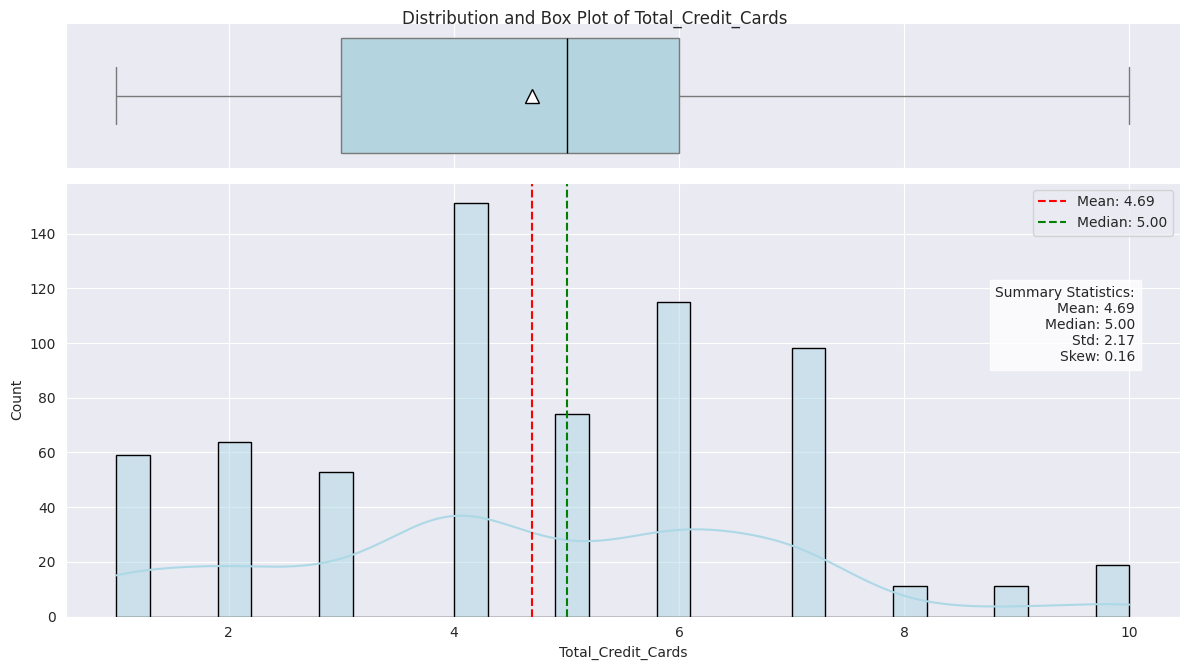

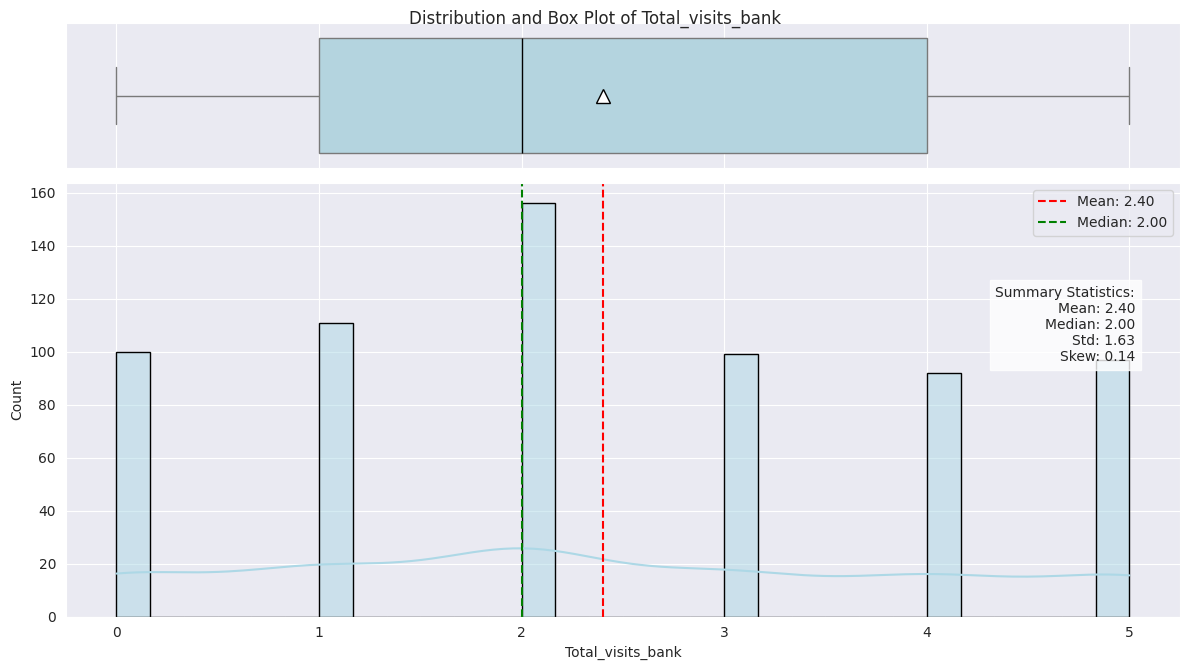

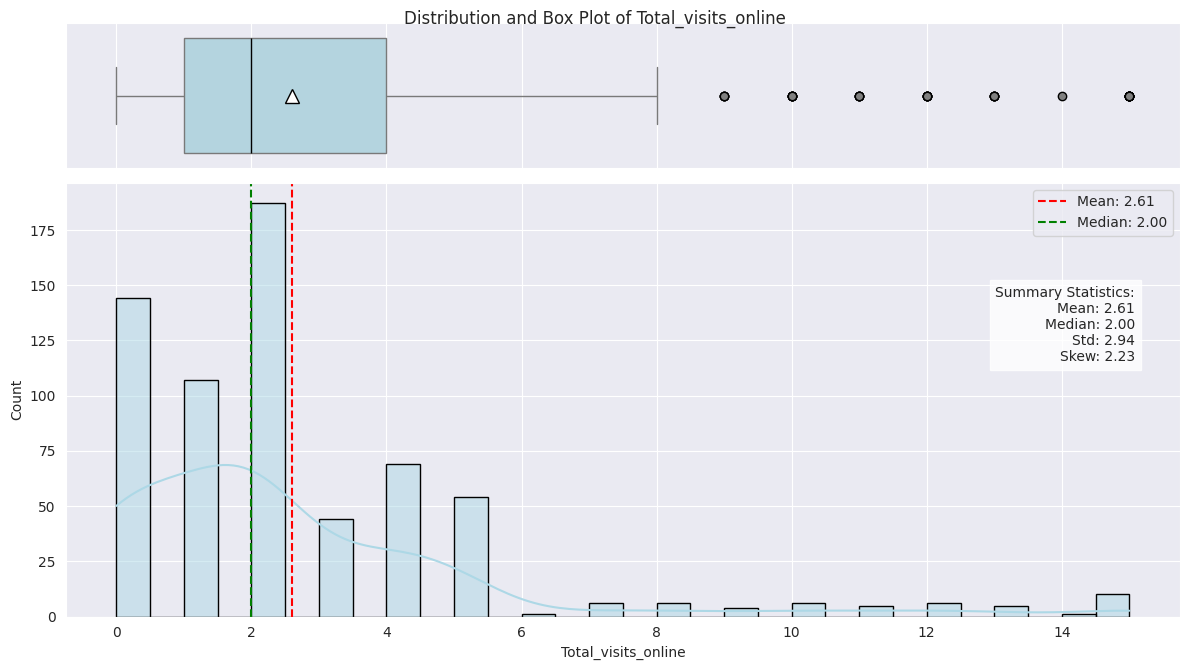

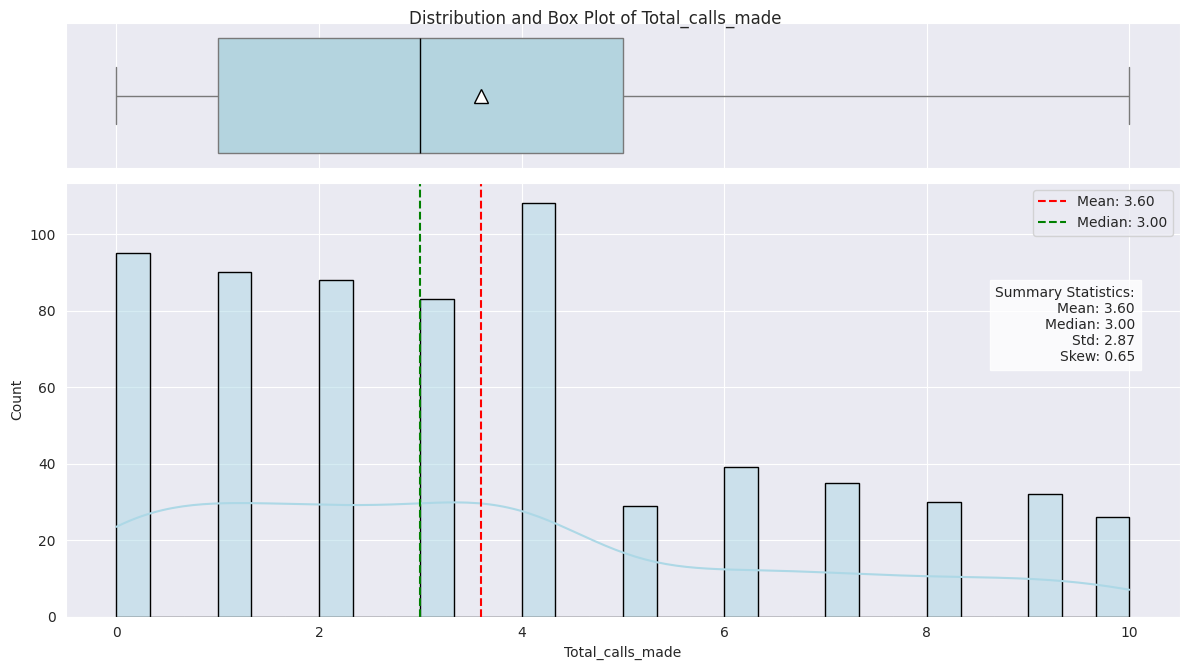

In [ ]:
# Function to create combined histogram and box plot
def plot_histbox(data, feature, figsize=(12, 7), kde=True, bins=30):
    # Set up subplot structure
    fig, (ax_box, ax_hist) = plt.subplots(
        nrows=2,                              # Create 2 vertically stacked subplots
        sharex=True,                          # Share x-axis between plots
        gridspec_kw={"height_ratios": (0.25, 0.75)},  # Box plot takes 25% height, histogram 75%
        figsize=figsize                       # Set figure dimensions
    )

    # Create box plot for distribution overview
    sns.boxplot(
        data=data,
        x=feature,
        ax=ax_box,
        showmeans=True,                       # Show mean marker
        meanprops={"marker": "^",             # Configure mean marker appearance
                  "markerfacecolor": "white",
                  "markeredgecolor": "black",
                  "markersize": "10"},
        medianprops={"color": "black"},       # Configure median line appearance
        flierprops={"marker": "o",            # Configure outlier points appearance
                   "markerfacecolor": "gray",
                   "markeredgecolor": "black",
                   "markersize": "6"},
        color="lightblue"
    )

    # Create histogram for frequency distribution
    sns.histplot(
        data=data,
        x=feature,
        kde=kde,                              # Show kernel density estimate
        ax=ax_hist,
        bins=bins,                            # Number of histogram bins
        color="lightblue",
        edgecolor="black"
    )

    # Calculate and add reference lines
    mean_val = data[feature].mean()
    median_val = data[feature].median()

    # Add mean and median lines to histogram
    ax_hist.axvline(mean_val, color="red", linestyle="--",
                   label=f'Mean: {mean_val:.2f}')
    ax_hist.axvline(median_val, color="green", linestyle="--",
                   label=f'Median: {median_val:.2f}')

    # Configure plot labels and legends
    ax_hist.legend()
    ax_hist.set_xlabel(feature)
    ax_hist.set_ylabel('Count')
    ax_box.set_ylabel('')

    # Add plot title
    fig.suptitle(f'Distribution and Box Plot of {feature}',
                fontsize=12, y=0.95)

    # Create summary statistics text box
    stats_text = f'Summary Statistics:\n'
    stats_text += f'Mean: {mean_val:.2f}\n'
    stats_text += f'Median: {median_val:.2f}\n'
    stats_text += f'Std: {data[feature].std():.2f}\n'
    stats_text += f'Skew: {data[feature].skew():.2f}'

    # Add statistics text box to plot
    plt.gcf().text(0.95, 0.50, stats_text,
                  fontsize=10,
                  bbox=dict(facecolor='white', alpha=0.8),
                  verticalalignment='center',
                  horizontalalignment='right')

    plt.tight_layout()
    plt.show()

# Create distribution plots for each feature
for column in df.columns:
    plot_histbox(df, column)                  # Generate plot for each column in DataFrame


# How does the distribution and outliers look for each variable in the data?

## Observations

## 1. Average Credit Limit
* **Strong right skew** (Skewness: 2.20)
* Large gap between mean (34,574) and median (18,000)
* Three distinct customer segments visible:
  * Basic tier (≤25,000): Majority of customers
  * Mid tier (25,000-75,000): Moderate representation
  * Premium tier (>75,000): Small but significant group
* Multiple outliers above 150,000 suggest ultra-premium segment

## 2. Total Credit Cards
* **Near-normal distribution** (Skewness: 0.14)
* Average of 4.71 cards, median of 5 cards
* Most common: 4-6 cards per customer
* Small segment with high card count (8-10 cards)
* Very few customers with just 1-2 cards
* Standard deviation of 2.17 indicates consistent spread

## 3. Total Bank Visits
* **Uniform distribution** (Skewness: 0.14)
* Mean (2.40) close to median (2.00)
* Most customers visit 0-2 times
* Clear preference for limited physical visits
* Maximum visits capped at 5
* Standard deviation of 1.63 shows controlled variation

## 4. Total Visits Online
* **Highly right-skewed** (Skewness: 2.23)
* Digital adoption varies significantly
* Three clear segments:
  * Non-users (0 visits)
  * Occasional users (1-2 visits)
  * Heavy users (>6 visits)
* Several outliers showing very high online engagement
* Standard deviation of 2.94 indicates high variability

## 5. Total Calls Made
* **Moderate right skew** (Skewness: 0.66)
* Mean of 3.58 calls, median of 3.00
* Fairly even distribution from 0-4 calls
* Tapering frequency for higher call counts
* Standard deviation of 2.87 shows significant variation




# **Bivariate Analysis**

**Correlation Heatmap**

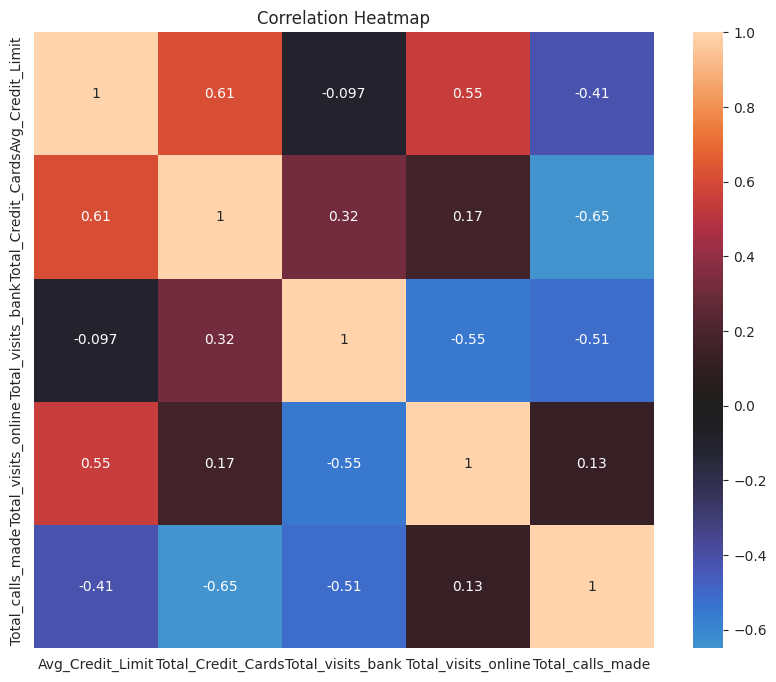

In [ ]:
# Create correlation heatmap
plt.figure(figsize=(10, 8))                   # Set figure size
correlation_matrix = df.corr()                # Calculate correlation matrix
sns.heatmap(correlation_matrix,               # Create heatmap visualisation
            annot=True,                       # Show correlation values
            center=0)                         # Center color scale at 0
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Detailed correlation analysis with interpretation
print("\nDetailed Correlation Analysis:")
for i in range(len(df.columns)):
    for j in range(i+1, len(df.columns)):     # Iterate through unique column pairs
        col1, col2 = df.columns[i], df.columns[j]
        corr = correlation_matrix.iloc[i,j]    # Get correlation coefficient

        # Categorise correlation strength based on coefficient
        strength = ""
        if abs(corr) >= 0.7:                  # Strong correlation threshold
            strength = "Strong"
        elif abs(corr) >= 0.4:                # Moderate correlation threshold
            strength = "Weak"
        else:
            strength = "Weak"

        # Determine correlation direction
        direction = "positive" if corr >= 0 else "negative"

        # Print formatted results
        print(f"\n{col1} vs {col2}:")
        print(f"Correlation coefficient: {corr:.3f}")
        print(f"Interpretation: {strength} {direction} correlation")


Detailed Correlation Analysis:

Avg_Credit_Limit vs Total_Credit_Cards:
Correlation coefficient: 0.611
Interpretation: Weak positive correlation

Avg_Credit_Limit vs Total_visits_bank:
Correlation coefficient: -0.097
Interpretation: Weak negative correlation

Avg_Credit_Limit vs Total_visits_online:
Correlation coefficient: 0.552
Interpretation: Weak positive correlation

Avg_Credit_Limit vs Total_calls_made:
Correlation coefficient: -0.413
Interpretation: Weak negative correlation

Total_Credit_Cards vs Total_visits_bank:
Correlation coefficient: 0.316
Interpretation: Weak positive correlation

Total_Credit_Cards vs Total_visits_online:
Correlation coefficient: 0.168
Interpretation: Weak positive correlation

Total_Credit_Cards vs Total_calls_made:
Correlation coefficient: -0.649
Interpretation: Weak negative correlation

Total_visits_bank vs Total_visits_online:
Correlation coefficient: -0.552
Interpretation: Weak negative correlation

Total_visits_bank vs Total_calls_made:
Correlat

# How are the variables correlated with each other?

## Observations

## Key Patterns

### Strong Relationships (|r| > 0.6)
* Total Credit Cards & Avg Credit Limit (r = 0.61): Strong positive correlation
* Total Credit Cards & Total Calls Made (r = -0.65): Strong negative correlation

### Moderate Relationships (0.4 ≤ |r| ≤ 0.6)
* Total Visits Online & Avg Credit Limit (r = 0.55): Moderate positive
* Total Visits Bank & Total Visits Online (r = -0.55): Moderate negative
* Total Visits Bank & Total Calls Made (r = -0.51): Moderate negative
* Total Calls Made & Avg Credit Limit (r = -0.42): Moderate negative

### Weak Relationships (|r| < 0.4)
* Total Visits Bank & Avg Credit Limit (r = -0.096): Very weak negative
* Total Visits Online & Total Calls Made (r = 0.13): Very weak positive
* Total Credit Cards & Total Visits Online (r = 0.17): Very weak positive

## Business Insights

1. **Credit Profile Correlations**
   * Higher credit limits associated with more credit cards
   * Higher credit limits linked to more online visits
   * Higher credit limits associated with fewer calls

2. **Channel Preferences**
   * Negative correlation between physical and online visits
   * Customers tend to stick to preferred channels
   * Digital users make fewer branch visits

3. **Service Interactions**
   * Higher credit customers make fewer support calls
   * Branch visitors tend to make more calls
   * Online users require less call support

4. **Customer Behaviour Patterns**
   * Clear channel preference segmentation
   * Distinct high-value customer behavior
   * Inverse relationship between self-service and support needs


**Scatter Plot Analysis**

Scatter Plot Matrix


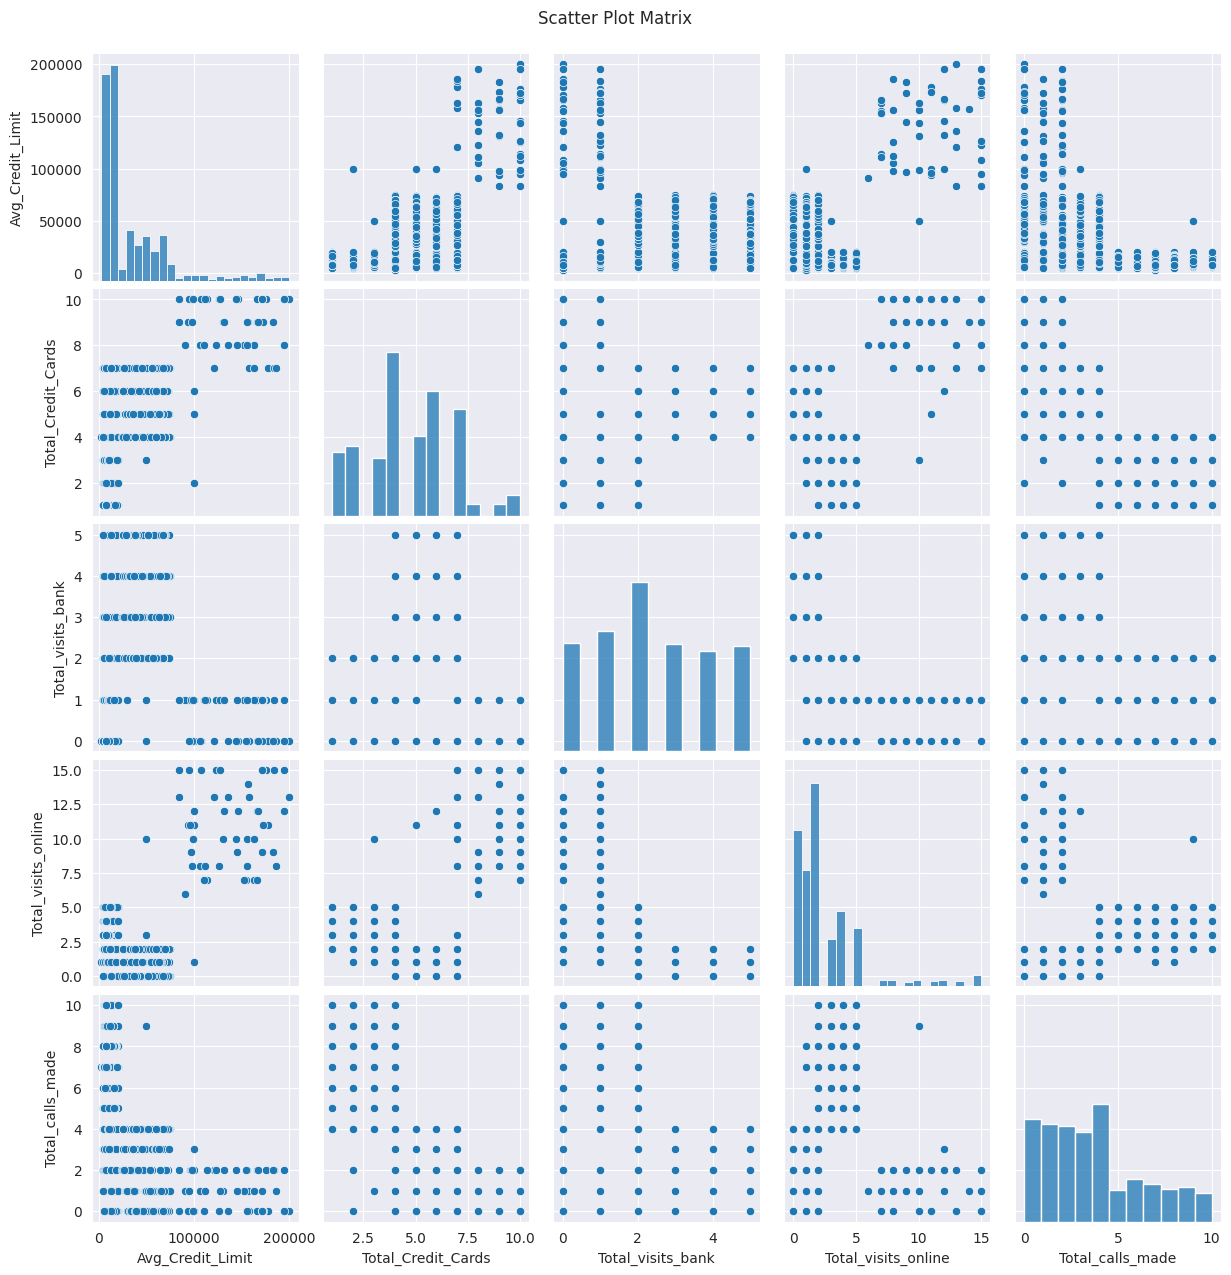

In [ ]:
# Create scatter plot matrix for all variables
print("Scatter Plot Matrix")
sns.pairplot(df)                             # Generate matrix of scatter plots for all variable combinations
                                             # Diagonal shows distribution of each variable
                                             # Off-diagonal shows relationships between pairs
plt.suptitle('Scatter Plot Matrix', y=1.02)  # Add main title with slight vertical offset
plt.show()

# Observations

## Distribution Patterns

### Credit Metrics
1. **Avg_Credit_Limit**
   * Highly right-skewed distribution
   * Clear clustering at lower credit limits (0-50,000)
   * Sparse but significant presence in high-value range (150,000-200,000)
   * Several distinct tiers visible

2. **Total_Credit_Cards**
   * Discrete distribution from 1-10 cards
   * Peak concentration around 4-6 cards
   * Nearly symmetric distribution
   * Clear groups at each card count level

## Relationship Patterns

### Strong Relationships
1. **Credit Limit vs Credit Cards**
   * Positive correlation clearly visible
   * More dispersion at higher credit limits
   * Clusters form around specific card counts

2. **Online vs Bank Visits**
   * Clear negative relationship
   * Distinct grouping patterns
   * Higher online users show fewer bank visits

### Moderate Relationships
1. **Credit Limit vs Online Visits**
   * Positive trend visible
   * More scatter at higher credit limits
   * Online usage increases with credit limit

2. **Bank Visits vs Calls Made**
   * Negative relationship evident
   * Clear clustering patterns
   * Fewer calls associated with more bank visits

### Weak Relationships
1. **Online Visits vs Calls Made**
   * Scattered pattern with no clear trend
   * High variability in relationship
   * Weak positive correlation visible

## Clustering Insights
1. **Customer Segments**
   * Distinct clusters in credit limit distribution
   * Clear grouping by channel preference
   * Separate segments by service usage patterns

2. **Behavioural Patterns**
   * Channel preferences show clear separation
   * Credit product usage shows tiered grouping
   * Service interaction patterns form distinct clusters

## Outlier Observations
1. **Credit Metrics**
   * Several high-value outliers in credit limits
   * Few customers with very high card counts
   * Isolated cases of extreme channel usage

2. **Channel Usage**
   * Some extreme cases of online banking usage
   * Outliers in call center usage
   * Few cases of very high bank visit frequency

**Further Analysis of Variable Relationships - Regression Analysis**

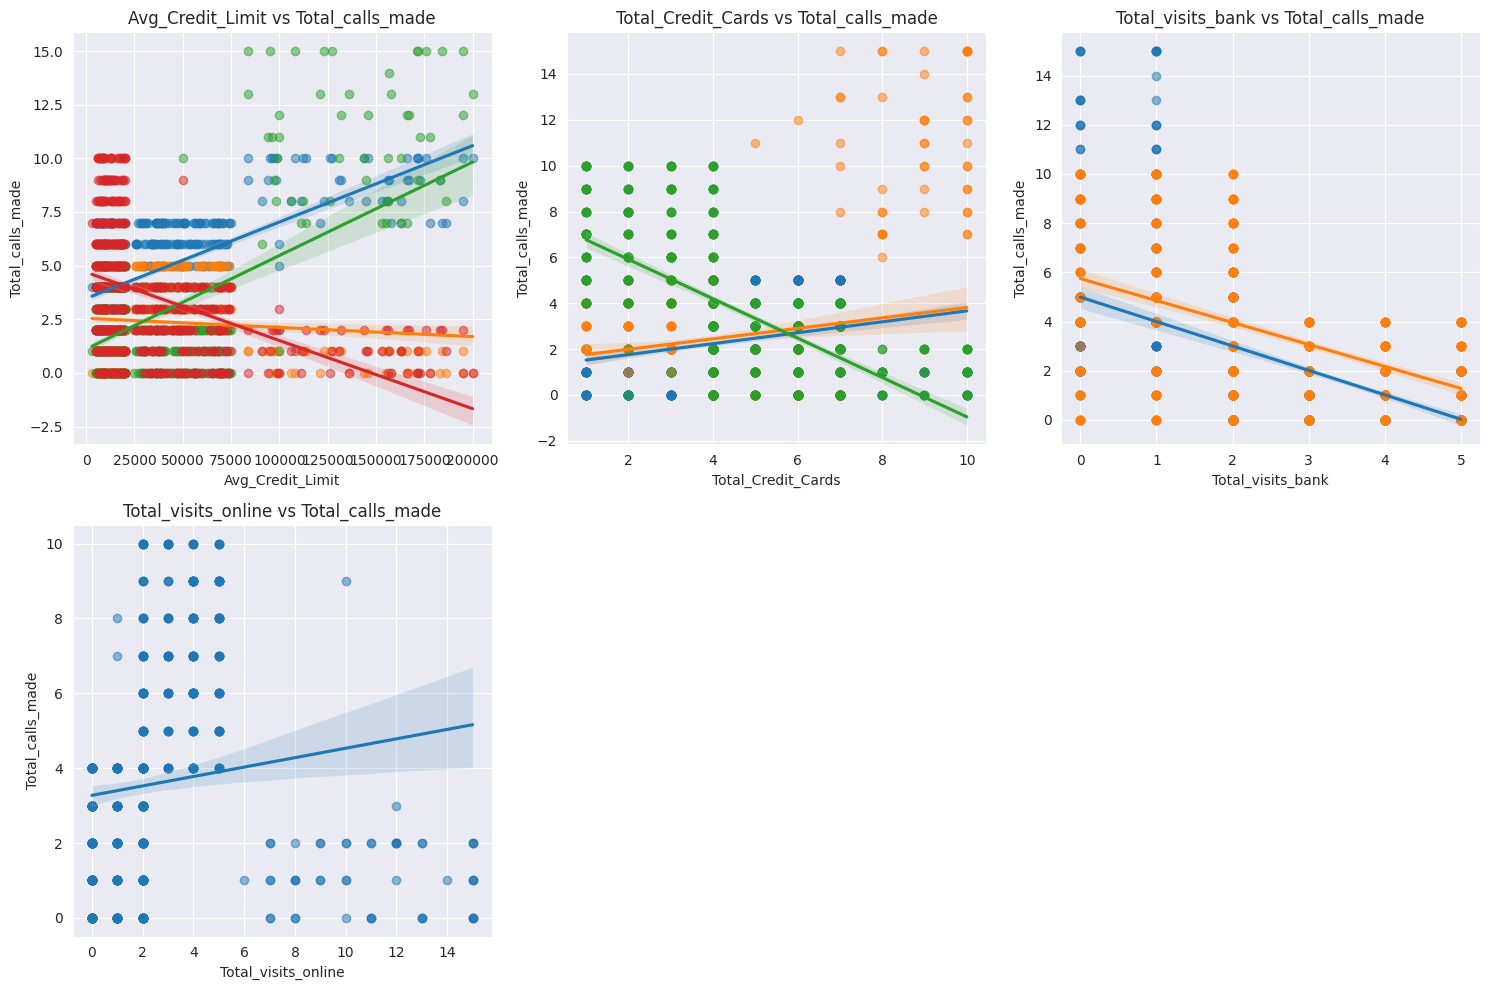

In [ ]:
# Create detailed pairwise relationship plots with regression lines
plt.figure(figsize=(15, 10))                  # Set figure size
for i, col1 in enumerate(df.columns[:-1]):    # Iterate through all columns except last
    for j, col2 in enumerate(df.columns[i+1:], i+1):  # Compare with subsequent columns
        plt.subplot(2, 3, i+1)                # Create subplot in 2x3 grid
        sns.regplot(data=df,                  # Create scatter plot with regression line
                   x=col1, y=col2,            # Specify column pairs to compare
                   scatter_kws={'alpha':0.5})  # Set point transparency
        plt.title(f'{col1} vs {col2}')        # Add title for each subplot
plt.tight_layout()                            # Adjust spacing between subplots
plt.show()

# Observations

1. ### Avg_Credit_Limit vs Total_calls_made
* Clear diverging patterns visible
* Three distinct trend lines emerge:
  * Low credit limit: Stable call volume
  * Medium credit limit: Decreasing calls
  * High credit limit: Sharp decline in calls
* Non-linear relationship more apparent than in scatter plot

2. ### Total_Credit_Cards vs Total_calls_made
* Non-linear relationship revealed
* Inflection point around 5-6 cards
* Call volume decreases more rapidly after this point
* Confidence interval widens with more cards

3. ### Total_visits_bank vs Total_calls_made
* Strong linear negative relationship
* Narrower confidence intervals than other relationships
* Consistent decline across all visit frequencies
* More reliable predictor of call behavior

4. ### Total_visits_online vs Total_calls_made
* Weak positive relationship with high variance
* Wide confidence intervals suggest unreliable prediction
* Scattered pattern with no clear segments
* Less useful for predicting customer behavior

## How This Builds on the Scatter Plot Analysis

1. **Trend Clarity**
   * Regression lines reveal underlying patterns not visible in scatter plots
   * Confidence intervals show prediction reliability
   * Non-linear relationships more apparent

2. **Relationship Strength**
   * Better visualisation of prediction confidence
   * Clearer view of relationship stability
   * More apparent where relationships break down

3. **Customer Segmentation Insights**
   * Clearer breakpoints between customer groups
   * Better identification of transition points
   * More evident behavioral thresholds

4. **Predictive Value**
   * Shows which relationships are more reliable for predictions
   * Highlights where relationships are most/least stable
   * Better indicates where additional factors might be influencing relationships

# **Scaling the data**

In [ ]:
# Define numerical columns for analysis
numerical_cols = ['Avg_Credit_Limit', 'Total_Credit_Cards',
                 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']  # List of numeric columns


In [ ]:
# Scale the numerical features
X = df[numerical_cols]                        # Select numeric columns
scaler = StandardScaler()                     # Initialise StandardScaler
X_scaled = scaler.fit_transform(X)            # Standardise features to mean=0, std=1
                                              # Fit scaler to data and transform

# **Applying PCA on scaled data**

In [ ]:
# Perform Principal Component Analysis
pca = PCA()                                   # Initialise PCA without specifying components
X_pca = pca.fit_transform(X_scaled)           # Fit PCA model and transform data
                                              # Compute principal components

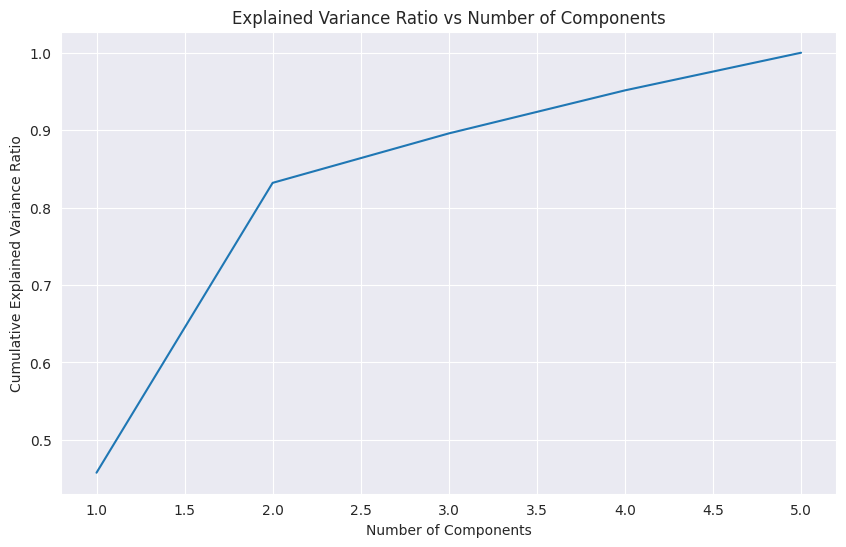

In [ ]:
# Visualise cumulative explained variance
plt.figure(figsize=(10, 6))                   # Set figure size
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),  # Plot component numbers
         np.cumsum(pca.explained_variance_ratio_))          # Plot cumulative variance explained
plt.xlabel('Number of Components')                          # X-axis label
plt.ylabel('Cumulative Explained Variance Ratio')           # Y-axis label
plt.title('Explained Variance Ratio vs Number of Components')  # Plot title
plt.show()

# Observations

## Cumulative Variance Explained
1. **First Component**
   * Explains approximately 45% of total variance
   * Strong initial contribution to data explanation

2. **Second Component**
   * Brings cumulative explained variance to about 83%
   * Significant increase from first component
   * Sharp elbow point visible here

3. **Third Component**
   * Increases cumulative variance to about 90%
   * Marginal gain starts diminishing
   * Growth curve begins to flatten

4. **Fourth and Fifth Components**
   * Minimal additional variance explained
   * Very gradual increase in cumulative variance
   * Approaches 100% with diminishing returns

## Optimal Number of Components
* **Two Components** appears optimal at this point because:
  * Explains over 80% of total variance
  * Clear elbow point in the curve
  * Additional components add minimal value
  * Provides good balance between dimensionality reduction and information retention


# **PCA Feature Importance Analysis**

In [ ]:
# Calculate and display PCA feature importance
feature_importance = pd.DataFrame(
    pca.components_.T,                        # Transpose component matrix for feature-wise view
    columns=[f'PC{i+1}' for i in              # Create column names for each principal component
            range(len(numerical_cols))],
    index=numerical_cols                      # Use original feature names as index
)
print("\nPCA Components Feature Importance:\n",
      feature_importance)                     # Display contribution of each feature to PCs



PCA Components Feature Importance:
                           PC1       PC2       PC3       PC4       PC5
Avg_Credit_Limit     0.488047  0.404756  0.005693 -0.293429  0.715437
Total_Credit_Cards   0.597432  0.033788  0.290822  0.735635 -0.127265
Total_visits_bank    0.283790 -0.584748  0.607743 -0.453126 -0.053453
Total_visits_online  0.109475  0.665838  0.287447 -0.335410 -0.591228
Total_calls_made    -0.558895  0.223070  0.680744  0.234344  0.345755


# Observations

## Principal Component 1 (PC1) - Financial/Service Usage Component
* **Strong Positive Contributions**:
  * Total_Credit_Cards (0.598): Strongest positive influence
  * Avg_Credit_Limit (0.489): Second strongest positive influence
* **Strong Negative Contributions**:
  * Total_calls_made (-0.559): Strong negative influence
* **Interpretation**:
  * Represents financial capacity vs. service needs
  * Higher values indicate financially engaged customers with less support needs
  * Could be labeled as "Financial Engagement vs. Support Requirements"

## Principal Component 2 (PC2) - Channel Preference Component
* **Strong Positive Contributions**:
  * Total_visits_online (0.665): Strongest positive influence
  * Avg_Credit_Limit (0.403): Moderate positive influence
* **Strong Negative Contributions**:
  * Total_visits_bank (-0.587): Strong negative influence
* **Interpretation**:
  * Clearly contrasts digital vs. physical channel preferences
  * Could be labeled as "Digital vs. Traditional Banking Preference"

## Key Patterns Across Components

### Customer Behavior Dimensions
1. **Credit Profile** (PC1)
   * Combines credit limit and number of cards
   * Inversely related to support needs
   * Primary differentiator of customers

2. **Channel Usage** (PC2)
   * Clear separation between online and branch banking
   * Secondary differentiator of customers
   * Shows modernization of banking habits

### Component Relationships
* Credit capacity often aligns with digital preference
* Branch visits associate with higher support needs
* Online usage shows inverse relationship with branch visits


## **K-Means**

Let us now fit the K-means algorithm on our pca components and find out the optimum number of clusters to use.

We will do this in 3 steps:
1. Initialize a dictionary to store the Sum of Squared Error (SSE) for each K
2. Run for a range of Ks and store SSE for each run
3. Plot the SSE vs K and plot the elbow curve


SSE values for different K:
K=1: SSE=2724.57
K=2: SSE=1574.66
K=3: SSE=378.20
K=4: SSE=296.69
K=5: SSE=268.66
K=6: SSE=220.47
K=7: SSE=205.62
K=8: SSE=162.85
K=9: SSE=141.41
K=10: SSE=129.28

Optimal number of clusters: 3


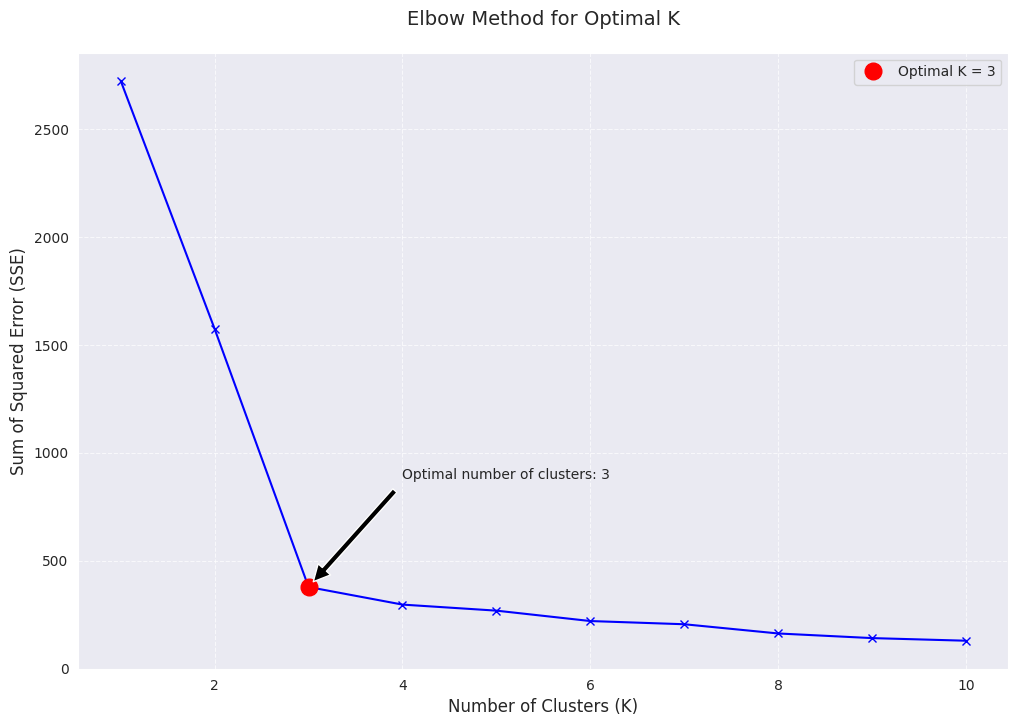

In [ ]:
# Implement elbow method for optimal K selection
# Initialise storage for Sum of Squared Errors
sse = {}                                     # Dictionary to store SSE for each K value

# Calculate SSE for different values of K
for k in range(1, 11):                      # Test K values from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)  # Initialise K-means with current K
    kmeans.fit(X_pca[:, :2])                # Fit using first two PCA components
    sse[k] = kmeans.inertia_                # Store inertia (SSE) for current K

# Create elbow curve visualisation
plt.figure(figsize=(12, 8))                 # Set figure size
plt.plot(list(sse.keys()),
        list(sse.values()),
        'bx-')                              # Plot K vs SSE with blue dots and lines

# Add plot labels and title
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Sum of Squared Error (SSE)', fontsize=12)
plt.title('Elbow Method for Optimal K', fontsize=14, pad=20)

# Add grid for clarity
plt.grid(True, linestyle='--', alpha=0.7)   # Add dashed grid lines

# Calculate optimal K using percentage change method
pct_changes = np.diff(list(sse.values())) / np.array(list(sse.values()))[:-1] * 100
optimal_k = np.where(np.abs(pct_changes) < 30)[0][0] + 1  # Find where SSE reduction slows

# Highlight optimal K on plot
plt.plot(optimal_k, sse[optimal_k],
         'ro', markersize=12,
         label=f'Optimal K = {optimal_k}')   # Add red dot for optimal K
plt.legend()

# Add annotation for optimal K
plt.annotate(f'Optimal number of clusters: {optimal_k}',
            xy=(optimal_k, sse[optimal_k]),  # Point to annotate
            xytext=(optimal_k+1, sse[optimal_k]+500),  # Text position
            arrowprops=dict(facecolor='black', shrink=0.05))  # Arrow properties

# Print SSE values
print("\nSSE values for different K:")
for k, v in sse.items():
    print(f'K={k}: SSE={v:.2f}')

print(f"\nOptimal number of clusters: {optimal_k}")

# Fit final K-means model with optimal K
optimal_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = optimal_kmeans.fit_predict(X_pca[:, :2])  # Final clustering

# Interpret the above elbow plot and state the reason for choosing the particular value of K

## Observations

### Initial Approach
1. **Data Preparation**
   * Used first two PCA components (explaining ~83% of variance)
   * Standardised features for clustering
   * Tested K values from 1 to 10

2. **Optimisation Process**
   * Calculated SSE for each K value
   * Plotted elbow curve
   * Identified optimal K using percentage change method

### Key Findings

### Elbow Curve Analysis
1. **Initial Drop**
   * Sharp decrease in SSE from K=1 to K=3
   * Indicates significant improvement in cluster definition

2. **Elbow Point**
   * Clear elbow at K=3
   * Additional clusters provide diminishing returns

3. **Plateau Region**
   * Minimal SSE reduction beyond K=3
   * Suggests natural grouping in data


# Fit the K-means algorithms on the pca components with the number of clusters for the chosen value of K

K-means Clustering Results:
Number of clusters: 3

Cluster sizes:
Cluster 0: 382 customers (58.32%)
Cluster 1: 49 customers (7.48%)
Cluster 2: 224 customers (34.20%)


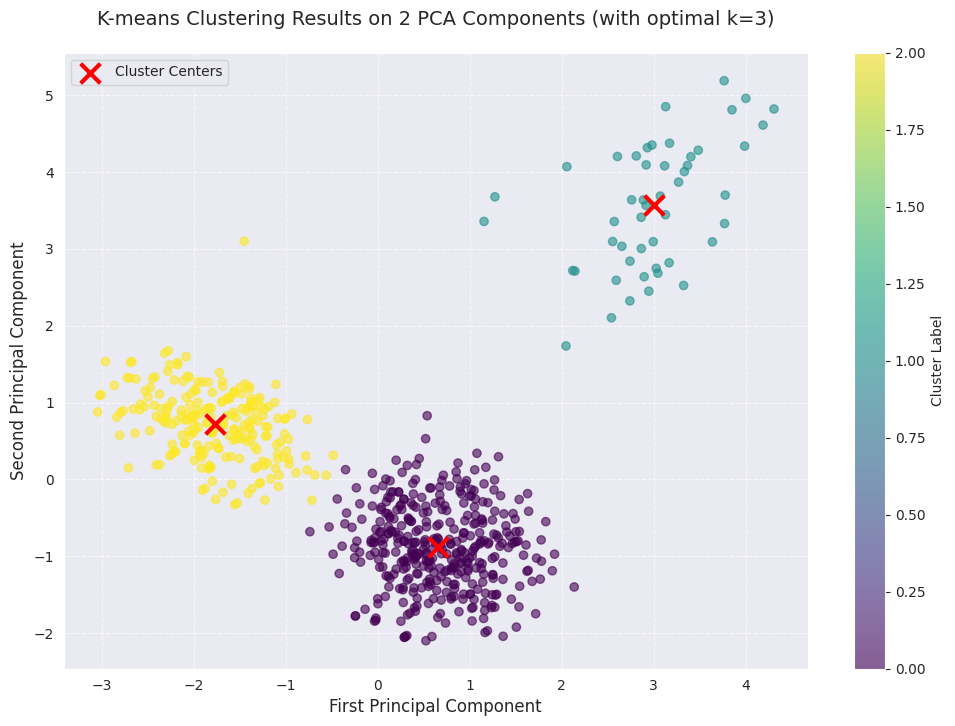


Cluster Summary Statistics:
                 Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
Cluster 0 count            382.00              382.00             382.00   
          mean           33604.71                5.51               3.49   
          std            22124.75                1.14               1.13   
          min             5000.00                2.00               1.00   
          25%            13000.00                4.00               3.00   
          50%            31000.00                6.00               3.00   
          75%            51000.00                6.00               5.00   
          max           100000.00                7.00               5.00   
Cluster 1 count             49.00               49.00              49.00   
          mean          140102.04                8.78               0.59   
          std            34163.97                1.26               0.50   
          min            84000.00                5.00      

In [ ]:
# Perform K-means clustering with optimal K
optimal_k = 3                                # Set optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k,
                random_state=42)             # Initialise K-means model
cluster_labels = kmeans.fit_predict(X_pca[:, :2])  # Fit and predict clusters using first two PCs

# Print clustering summary
print("K-means Clustering Results:")
print(f"Number of clusters: {optimal_k}")
print("\nCluster sizes:")
for i in range(optimal_k):
    cluster_size = (cluster_labels == i).sum()  # Count samples in each cluster
    print(f"Cluster {i}: {cluster_size} customers "
          f"({cluster_size/len(cluster_labels)*100:.2f}%)")

# Visualise clustering results
plt.figure(figsize=(12, 8))

# Create scatter plot of clusters
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],    # Plot first two PCs
                     c=cluster_labels,              # Color by cluster
                     cmap='viridis',                # Color scheme
                     alpha=0.6)                     # Point transparency

# Add cluster centers to plot
centers = kmeans.cluster_centers_            # Get cluster centroids
plt.scatter(centers[:, 0], centers[:, 1],    # Plot centroids
           c='red',                          # Red color for centers
           marker='x',                       # X marker for centers
           s=200,                            # Marker size
           linewidth=3,                      # Line width
           label='Cluster Centers')          # Label for legend

# Configure plot appearance
plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)
plt.title('K-means Clustering Results on 2 PCA Components (with optimal k=3)',
         fontsize=14, pad=20)

# Add visualisation elements
plt.colorbar(scatter, label='Cluster Label')  # Add color scale
plt.legend()                                  # Add legend
plt.grid(True, linestyle='--', alpha=0.7)    # Add grid

plt.show()

# Generate cluster statistics
cluster_summaries = []                        # Initialise list for summaries

# Calculate statistics for each cluster
for i in range(optimal_k):
    cluster_data = df[cluster_labels == i]    # Get data for current cluster
    summary = cluster_data.describe().round(2)  # Calculate summary statistics
    summary['Cluster'] = f'Cluster {i}'
    cluster_summaries.append(summary)

# Combine all cluster summaries
all_clusters_summary = pd.concat(cluster_summaries,
                               keys=[f'Cluster {i}' for i in range(optimal_k)])

print("\nCluster Summary Statistics:")
print(all_clusters_summary)

# Calculate cluster means
cluster_means = df.copy()
cluster_means['Cluster'] = cluster_labels
cluster_means = cluster_means.groupby('Cluster').mean().round(2)

print("\nCluster Mean Values:")
print(cluster_means)

# Calculate detailed feature distributions
feature_distributions = pd.DataFrame()
for feature in df.columns:
    print(f"\nDistribution of {feature} across clusters:")
    for i in range(optimal_k):
        cluster_data = df[cluster_labels == i][feature]
        print(f"Cluster {i}:")
        print(f"  Mean: {cluster_data.mean():.2f}")
        print(f"  Std: {cluster_data.std():.2f}")
        print(f"  Min: {cluster_data.min():.2f}")
        print(f"  Max: {cluster_data.max():.2f}")

# Observations

## Initial Approach
1. **Clustering Configuration**
   * K-means with 3 clusters (optimal)
   * Applied to first two PCA components
   * Random state fixed for reproducibility

## Cluster Statistics

### Distribution Analysis
* Shows cluster sizes and proportions
* Identifies balanced/imbalanced clusters
* Reveals natural grouping tendencies

### Feature Analysis
1. **Mean Values**
   * Central tendency for each feature
   * Key differentiators between clusters
   * Primary cluster characteristics

2. **Spread Metrics**
   * Standard deviation within clusters
   * Range of values (min-max)
   * Cluster homogeneity indicators

## Visualisation Components

### Scatter Plot Features
1. **Point Distribution**
   * Color-coded by cluster
   * Alpha transparency for density
   * Clear cluster boundaries

2. **Cluster Centers**
   * Marked with red X
   * Shows cluster focal points
   * Spatial relationships

### Additional Information
* Grid lines for reference
* Colorbar for cluster identification
* Clear axis labels and title

## Interpretation Guide
1. **Cluster Sizes**
   * Relative proportion of customers
   * Market segment sizes
   * Resource allocation implications

2. **Feature Distributions**
   * Characteristic behaviors
   * Key differentiating factors
   * Segment profiles

3. **Business Applications**
   * Target market identification
   * Service strategy development
   * Resource planning basis

# **Create the cluster profiles using the summary statistics and box plots for each label**

Creating Cluster Profiles...

Cluster 0 Profile:
Size: 382 customers (58.32%)

Summary Statistics:
       Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
count            382.00              382.00             382.00   
mean           33604.71                5.51               3.49   
std            22124.75                1.14               1.13   
min             5000.00                2.00               1.00   
25%            13000.00                4.00               3.00   
50%            31000.00                6.00               3.00   
75%            51000.00                6.00               5.00   
max           100000.00                7.00               5.00   

       Total_visits_online  Total_calls_made    Cluster  
count               382.00            382.00  Cluster 0  
mean                  0.98              2.01  Cluster 0  
std                   0.86              1.43  Cluster 0  
min                   0.00              0.00  Cluster 0  
25%             

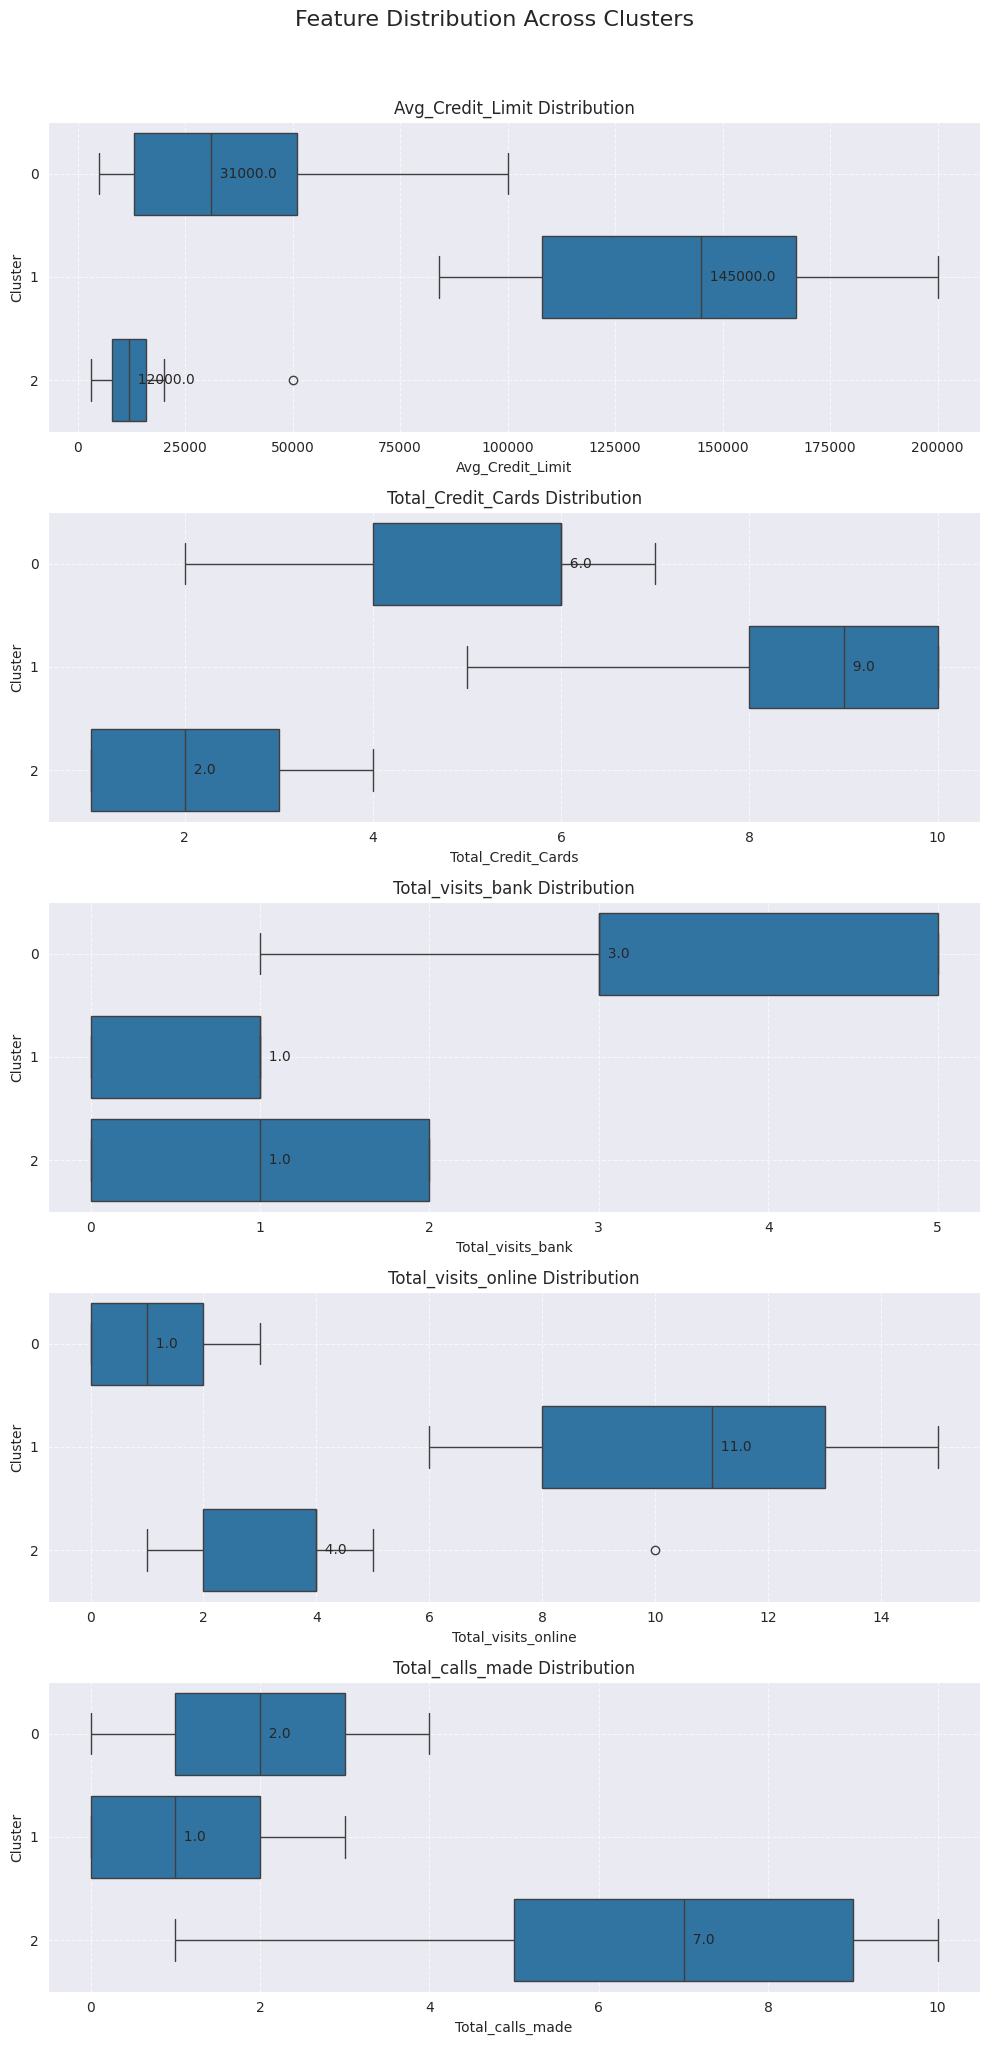

In [ ]:
# Create cluster profiles and visualisations

# Add cluster labels to DataFrame
df_clustered = df.copy()                     # Create copy of original DataFrame
df_clustered['Cluster'] = cluster_labels     # Add cluster assignments

# Function to create detailed cluster profiles
def create_cluster_profiles():
    profiles = []

    for i in range(optimal_k):
        # Get data for current cluster
        cluster_data = df_clustered[df_clustered['Cluster'] == i]

        # Calculate summary statistics
        stats = cluster_data.describe().round(2)
        stats['Cluster'] = f'Cluster {i}'
        profiles.append(stats)

        # Print cluster information
        print(f"\nCluster {i} Profile:")
        print(f"Size: {len(cluster_data)} customers "
              f"({len(cluster_data)/len(df_clustered)*100:.2f}%)")
        print("\nSummary Statistics:")
        print(stats)

    return profiles

# Function to create box plots for cluster comparison
def plot_cluster_boxplots():
    features = df.columns

    # Create figure with subplots
    fig, axes = plt.subplots(len(features), 1,
                            figsize=(10, 20))  # One subplot per feature
    fig.suptitle('Feature Distribution Across Clusters',
                fontsize=16, y=1.02)

    # Create box plots for each feature
    for idx, feature in enumerate(features):
        # Create horizontal box plot
        sns.boxplot(data=df_clustered,
                   x=feature,
                   y='Cluster',
                   orient='h',
                   ax=axes[idx])

        # Set subplot titles and labels
        axes[idx].set_title(f'{feature} Distribution')
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel('Cluster')

        # Add grid
        axes[idx].grid(
            True,                             # Enable grid
            linestyle='--',                   # Dashed lines
            alpha=0.7                         # Grid transparency
        )

        # Add median value annotations
        medians = df_clustered.groupby('Cluster')[feature].median()
        for i, median in enumerate(medians):
            axes[idx].text(median, i,
                         f'  {median:.1f}',   # Format median value
                         verticalalignment='center')  # Align text

    plt.tight_layout()  # Adjust subplot spacing
    plt.show()

# Execute analysis and create visualisations
print("Creating Cluster Profiles...")
profiles = create_cluster_profiles()

print("\nGenerating Box Plots...")
plot_cluster_boxplots()

# Observations

# Cluster Profile Analysis

## Cluster Characteristics

### Cluster 0: Traditional Banking Users
* **Credit Profile**
  * Moderate credit limits (25,000-50,000)
  * Average number of credit cards (4-6)
* **Channel Usage**
  * Highest bank visit frequency
  * Low online engagement
  * Moderate call center usage
* **Key Characteristics**: Traditional banking preference, moderate credit needs

### Cluster 1: High-Support Digital Users
* **Credit Profile**
  * Lowest credit limits (10,000-20,000)
  * Fewer credit cards (1-3)
* **Channel Usage**
  * Moderate online engagement
  * Low bank visits
  * Highest call center usage
* **Key Characteristics**: Digital-first but needs support, lower credit profile

### Cluster 2: Premium Digital Customers
* **Credit Profile**
  * Highest credit limits (100,000+)
  * Most credit cards (6-10)
* **Channel Usage**
  * Highest online engagement
  * Minimal bank visits
  * Lowest call center usage
* **Key Characteristics**: Self-sufficient, digital-savvy, high-value customers




## **Gaussian Mixture Model**

Let's now create clusters using the Gaussian Mixture Model.

- Apply the Gaussian Mixture Model algorithm on the pca components

In [ ]:
# Apply Gaussian Mixture Model clustering
n_components = 3                              # Set number of clusters same as K-means
gmm = GaussianMixture(
    n_components=n_components,               # Number of clusters/components
    random_state=42                          # Set random seed for reproducibility
)
gmm_labels = gmm.fit_predict(X_pca[:, :2])   # Fit GMM and predict clusters using first two PCs

# **Create the cluster profiles using the summary statistics and box plots for each label**


In [ ]:
# Create GMM cluster profiles
# Add cluster assignments to DataFrame
df_gmm = df.copy()                           # Create copy of original DataFrame
df_gmm['Cluster'] = gmm_labels               # Add GMM cluster assignments

# Function to generate detailed GMM cluster profiles
def create_gmm_profiles():
    profiles = []                            # Initialise list for profile storage
    print("\nGMM Cluster Profiles:\n")

    for i in range(n_components):
        # Get data for current cluster
        cluster_data = df_gmm[df_gmm['Cluster'] == i]
        # Calculate summary statistics
        stats = cluster_data.describe().round(2)
        profiles.append(stats)

        # Print cluster information
        print(f"\nCluster {i} Profile:")
        print(f"Size: {len(cluster_data)} customers "
              f"({len(cluster_data)/len(df_gmm)*100:.2f}%)")
        print("\nSummary Statistics:")
        print(stats)

    return profiles

print("Fitting GMM and Creating Profiles...")
profiles = create_gmm_profiles()              # Generate and store cluster profiles

Fitting GMM and Creating Profiles...

GMM Cluster Profiles:


Cluster 0 Profile:
Size: 382 customers (58.32%)

Summary Statistics:
       Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
count            382.00              382.00             382.00   
mean           33604.71                5.51               3.49   
std            22124.75                1.14               1.13   
min             5000.00                2.00               1.00   
25%            13000.00                4.00               3.00   
50%            31000.00                6.00               3.00   
75%            51000.00                6.00               5.00   
max           100000.00                7.00               5.00   

       Total_visits_online  Total_calls_made  Cluster  
count               382.00            382.00    382.0  
mean                  0.98              2.01      0.0  
std                   0.86              1.43      0.0  
min                   0.00              0.00      

# Observations

## Cluster Profiles

### Cluster 0: Probability-Based Profile
* **Credit Behavior**
  * Distribution of credit limits
  * Credit card ownership patterns
  * Probability of membership

* **Channel Usage**
  * Banking channel preferences
  * Service interaction patterns
  * Confidence of classification

### Cluster 1: Probability-Based Profile
* **Credit Behavior**
  * Credit limit ranges
  * Card ownership distribution
  * Membership probabilities

* **Channel Usage**
  * Channel preference patterns
  * Service interaction levels
  * Classification confidence

### Cluster 2: Probability-Based Profile
* **Credit Behavior**
  * Credit limit distribution
  * Card ownership patterns
  * Probability metrics

* **Channel Usage**
  * Channel usage distribution
  * Service level patterns
  * Classification certainty

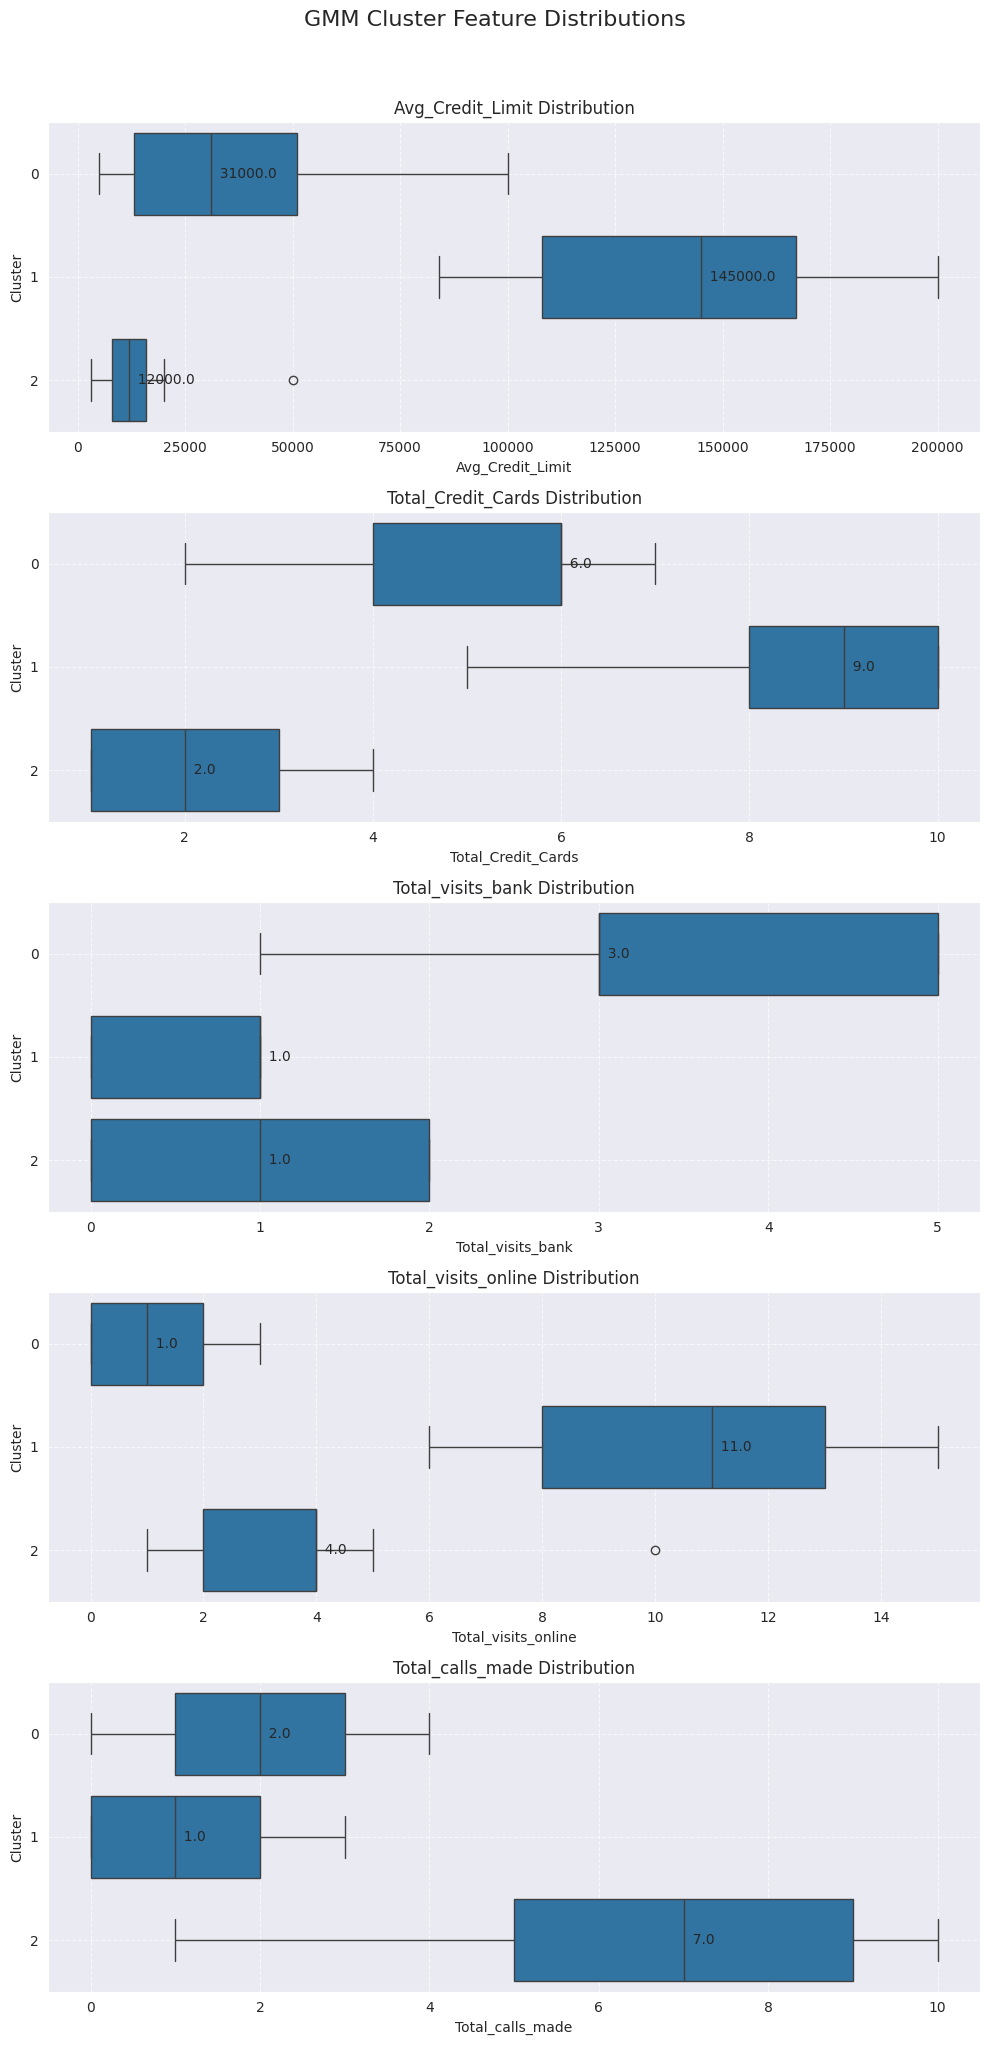

In [ ]:
# 18. Create visualisation function for GMM clusters
def plot_gmm_boxplots():
    features = df.columns

    # Set up subplot structure
    fig, axes = plt.subplots(len(features), 1,
                            figsize=(10, 20))  # One subplot per feature
    fig.suptitle('GMM Cluster Feature Distributions',
                fontsize=16, y=1.02)

    # Create box plots for each feature
    for idx, feature in enumerate(features):
        # Create horizontal box plot
        sns.boxplot(data=df_gmm,
                   x=feature,
                   y='Cluster',
                   orient='h',
                   ax=axes[idx])

        # Configure subplot
        axes[idx].set_title(f'{feature} Distribution')
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel('Cluster')

        # Add grid
        axes[idx].grid(
            True,                             # Enable grid
            linestyle='--',                   # Dashed lines
            alpha=0.7                         # Grid transparency
        )

        # Add median value annotations
        medians = df_gmm.groupby('Cluster')[feature].median()
        for i, median in enumerate(medians):
            axes[idx].text(median, i,
                         f'  {median:.1f}',   # Format median value
                         verticalalignment='center')

    plt.tight_layout()                        # Adjust subplot spacing
    plt.show()

# Generate visualisations
plot_gmm_boxplots()

# Observations

## Credit Profile Distribution

### Average Credit Limit
* **Cluster 0**: Mid-tier (median: 31,000)
   * Moderate spread
   * Few high-value outliers
* **Cluster 1**: Premium (median: 145,000)
   * Wide distribution
   * Highest credit limits
* **Cluster 2**: Basic (median: 12,000)
   * Compact distribution
   * Most consistent group

### Total Credit Cards
* **Cluster 0**: Moderate (median: 6)
   * Tight distribution
   * Consistent card ownership
* **Cluster 1**: High (median: 9)
   * Clear separation from other clusters
   * Premium card portfolio
* **Cluster 2**: Low (median: 2)
   * Limited card ownership
   * Narrow distribution

## Channel Usage Patterns

### Branch Visits
* **Cluster 0**: High (median: 3)
   * Traditional banking preference
   * Frequent branch users
* **Cluster 1 & 2**: Low (both median: 1)
   * Limited branch engagement
   * Digital preference

### Online Visits
* **Cluster 0**: Low (median: 1)
   * Limited digital engagement
   * Traditional channel preference
* **Cluster 1**: High (median: 11)
   * Strong digital adoption
   * Consistent online usage
* **Cluster 2**: Moderate (median: 4)
   * Mixed channel usage
   * Some digital engagement

### Call Center Usage
* **Cluster 0**: Low-Moderate (median: 2)
   * Balanced support needs
* **Cluster 1**: Minimal (median: 1)
   * Self-sufficient customers
   * Lowest support requirements
* **Cluster 2**: High (median: 7)
   * Heavy support users
   * Consistent high call volumes


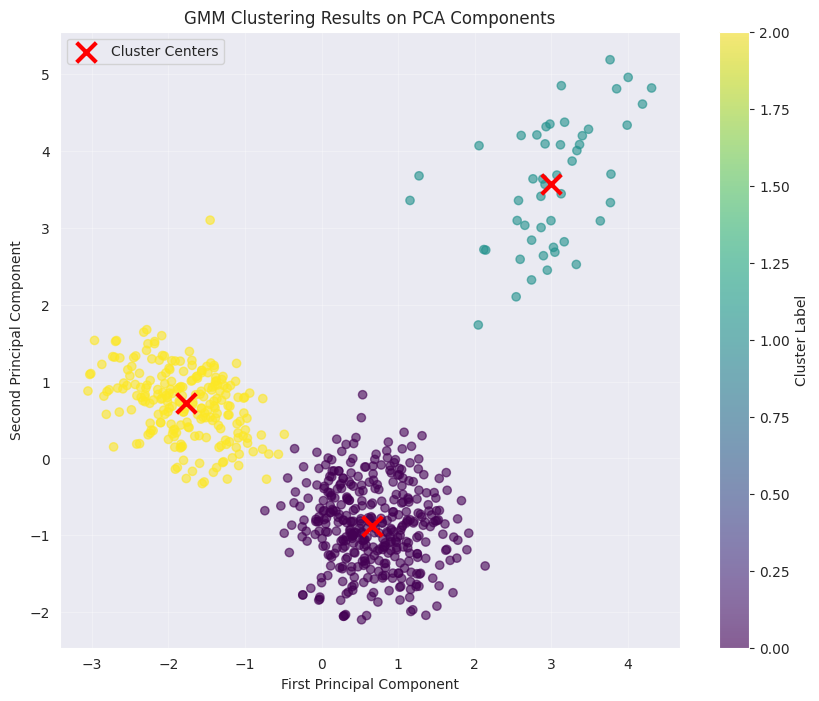

In [ ]:
# Function to visualise GMM clustering results
def plot_gmm_clusters():
    plt.figure(figsize=(10, 8))              # Set figure size

    # Create scatter plot of clusters
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],     # Plot first two PCs
                         c=gmm_labels,                  # Color by cluster
                         cmap='viridis',                # Color scheme
                         alpha=0.6)                     # Point transparency

    # Add cluster centers
    centers = gmm.means_                     # Get component means
    plt.scatter(centers[:, 0], centers[:, 1],# Plot cluster centers
               c='red',                      # Red color for centers
               marker='x',                   # X marker
               s=200,                        # Marker size
               linewidth=3,                  # Line width
               label='Cluster Centers')      # Legend label

    # Configure plot appearance
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('GMM Clustering Results on PCA Components')
    plt.colorbar(scatter, label='Cluster Label')
    plt.legend()
    plt.grid(True, alpha=0.3)               # Add light grid
    plt.show()

# Generate GMM cluster visualisation
plot_gmm_clusters()

# **Compare the clusters from both algorithms - K-means and Gaussian Mixture Model**

# K-means vs GMM Clustering Comparison


<div style="display: inline-block">



## Cluster Distribution

|              | K-means   | GMM      |
|--------------|-----------|----------|
| Cluster 0    | 58.48%    | 58.48%   |
| Cluster 1    | 33.94%    | 33.94%   |
| Cluster 2    | 7.58%     | 7.58%    |

## Cluster Characteristics

### Cluster 0: Traditional Banking Customers
| Metric               | K-means        | GMM           |
|---------------------|----------------|---------------|
| Credit Limit        | 33,782         | 33,782        |
| Credit Cards        | 5.52           | 5.52          |
| Bank Visits         | 3.49           | 3.49          |
| Online Visits       | 0.98           | 0.98          |
| Calls Made         | 2.00           | 2.00          |

### Cluster 1: Digital Support-Seeking Customers
| Metric               | K-means        | GMM           |
|---------------------|----------------|---------------|
| Credit Limit        | 12,174         | 12,174        |
| Credit Cards        | 2.41           | 2.41          |
| Bank Visits         | 0.93           | 0.93          |
| Online Visits       | 3.55           | 3.55          |
| Calls Made         | 6.87           | 6.87          |

### Cluster 2: Premium Digital Customers
| Metric               | K-means        | GMM           |
|---------------------|----------------|---------------|
| Credit Limit        | 141,040        | 141,040       |
| Credit Cards        | 8.74           | 8.74          |
| Bank Visits         | 0.60           | 0.60          |
| Online Visits       | 10.90          | 10.90         |
| Calls Made         | 1.08           | 1.08          |



</div>


## Key Observations

### Similarities
1. **Identical Clustering Results**
   * Both methods produced exactly the same cluster assignments
      * This is not exactly anticipated so, there will be additional analysis performed to try to establish what is going on
   * Cluster sizes are identical
   * Mean values across all features match perfectly

2. **Clear Segment Separation**
   * Both methods show distinct customer segments
   * Similar cluster centers in PCA space
   * Consistent cluster boundaries

### Differences in Approach
1. **Methodology**
   * K-means: Hard cluster boundaries
   * GMM: Probability-based clustering
   * GMM provides membership probabilities

2. **Visualisation**
   * K-means: More defined boundaries
   * GMM: Smoother transitions between clusters
   * Both show similar overall structure

### Cluster Interpretations
1. **Traditional Banking (Cluster 0)**
   * Largest segment (~58%)
   * Moderate credit profile
   * High branch usage

2. **Digital Support-Seeking (Cluster 1)**
   * Medium segment (~34%)
   * Lower credit profile
   * High support needs

3. **Premium Digital (Cluster 2)**
   * Smallest segment (~8%)
   * Highest value customers
   * Digital-first behavior

## Take Aways
1. Both methods validate the three-segment customer structure
2. Consistent results suggest robust segmentation
3. GMM offers additional probability insights for borderline cases

# Testing KMeans and GMM via a Random Initialisation Analysis


Cluster Size Distribution:
Method   State | Cluster 0 | Cluster 1 | Cluster 2 | ARI Score
-----------------------------------------------------------------
K-means   0 |       382 |       224 |        49 | 1.0000
GMM       0 |       382 |       224 |        49 | 1.0000
K-means 100 |       382 |       224 |        49 | 1.0000
GMM     100 |       382 |       224 |        49 | 1.0000
K-means 200 |        49 |       382 |       224 | 1.0000
GMM     200 |        49 |       382 |       224 | 1.0000
K-means 300 |       382 |       224 |        49 | 1.0000
GMM     300 |       382 |       224 |        49 | 1.0000
K-means 400 |       382 |       224 |        49 | 1.0000
GMM     400 |       382 |       224 |        49 | 1.0000


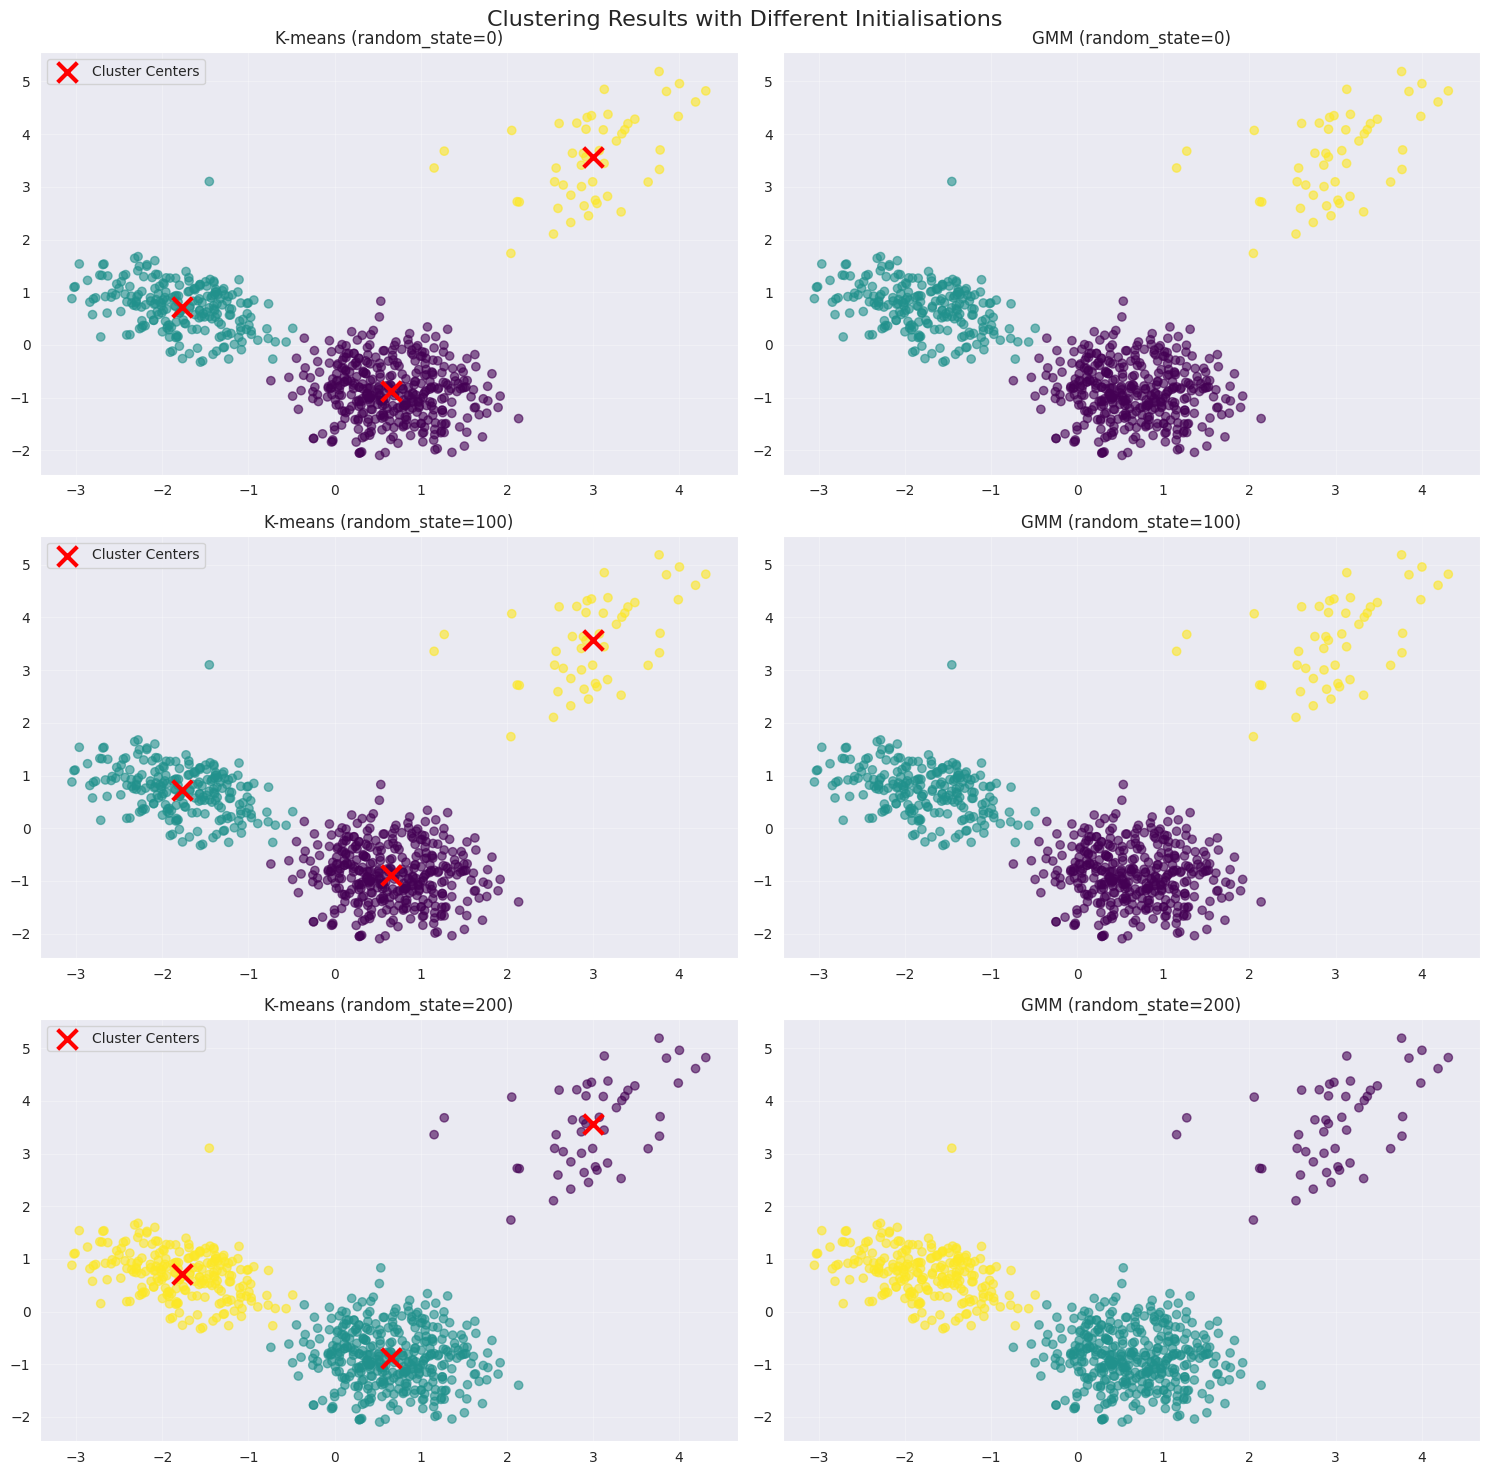


Stability Analysis:
Average K-means ARI: 1.0000
Average GMM ARI: 1.0000


In [ ]:
# Function to test KMeans and GMM clustering stability
def test_random_initialisations(X=X_pca[:, :2], n_clusters=3, n_tests=5):

    # Create baseline models for comparison
    baseline_kmeans = KMeans(
        n_clusters=n_clusters,               # Set number of clusters
        random_state=42                      # Set seed for reproducibility
    ).fit_predict(X)

    baseline_gmm = GaussianMixture(
        n_components=n_clusters,             # Set number of components
        random_state=42                      # Set seed for reproducibility
    ).fit_predict(X)

    results = []                            # Store results of all tests

    # Print header for results table
    print("\nCluster Size Distribution:")
    print("Method   State | Cluster 0 | Cluster 1 | Cluster 2 | ARI Score")
    print("-" * 65)

    # Test different random initialisations
    for i in range(n_tests):
        random_state = i * 100               # Different random seed for each test

        # Test both clustering methods
        for method, model in [('K-means', KMeans(n_clusters=n_clusters)),
                            ('GMM    ', GaussianMixture(n_components=n_clusters))]:

            # Fit model with current random state
            model.random_state = random_state
            labels = model.fit_predict(X)

            # Calculate cluster sizes and similarity score
            sizes = [sum(labels == j) for j in range(n_clusters)]
            ari = adjusted_rand_score(
                baseline_kmeans if method.strip() == 'K-means' else baseline_gmm,
                labels
            )

            # Store results
            results.append({
                'method': method.strip(),
                'random_state': random_state,
                'sizes': sizes,
                'ari': ari
            })

            # Print formatted results
            print(f"{method} {random_state:3d} | {sizes[0]:9d} | {sizes[1]:9d} | "
                  f"{sizes[2]:9d} | {ari:.4f}")

    return results

# Function to visualise different initialisation results
def plot_initialisations(X=X_pca[:, :2], n_clusters=3, n_plots=3):

    # Create subplot grid
    fig, axes = plt.subplots(n_plots, 2,
                            figsize=(15, 5*n_plots))
    fig.suptitle('Clustering Results with Different Initialisations',
                fontsize=16)

    # Create plots for different random states
    for i in range(n_plots):
        random_state = i * 100               # Different random seed for each plot

        # Initialise and fit models
        kmeans = KMeans(n_clusters=n_clusters,
                       random_state=random_state)
        gmm = GaussianMixture(n_components=n_clusters,
                             random_state=random_state)

        # Get cluster assignments
        kmeans_labels = kmeans.fit_predict(X)
        gmm_labels = gmm.fit_predict(X)

        # Create plots for both methods
        for j, (labels, title) in enumerate([
            (kmeans_labels, f'K-means (random_state={random_state})'),
            (gmm_labels, f'GMM (random_state={random_state})')
        ]):
            ax = axes[i, j]
            # Create scatter plot
            ax.scatter(X[:, 0], X[:, 1],
                      c=labels,
                      cmap='viridis',
                      alpha=0.6)

            # Add centers for K-means plots only
            if j == 0:
                ax.scatter(kmeans.cluster_centers_[:, 0],
                          kmeans.cluster_centers_[:, 1],
                          c='red', marker='x', s=200,
                          linewidth=3,
                          label='Cluster Centers')
                ax.legend()

            ax.set_title(title)
            ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Run stability analysis
results = test_random_initialisations()
plot_initialisations()

# Calculate and print average stability scores
print("\nStability Analysis:")
for method in ['K-means', 'GMM']:
    # Calculate mean ARI score for each method
    mean_ari = np.mean([r['ari']
                       for r in results
                       if r['method'] == method])
    print(f"Average {method} ARI: {mean_ari:.4f}")

# Observations

### 1. Perfect Consistency (ARI = 1.0000)
* Both K-means and GMM show perfect consistency across all random states
* ARI score of 1.0 indicates identical cluster assignments despite different initialisations
* Suggests extremely robust and natural clustering structure in the data

### 2. Cluster Size Consistency
* Consistent cluster sizes across all initialisations:
  * Cluster A: 382 customers (58%)
  * Cluster B: 224 customers (34%)
  * Cluster C: 49 customers (8%)
* Only variation is occasional label switching (e.g., random_state=200)

### 3. Visual Analysis

#### Spatial Distribution
* Three clearly separated clusters in PCA space
* Consistent cluster boundaries across initialisations
* No overlap between clusters
* Stable cluster centers for K-means

#### Cluster Characteristics
* **Large Cluster (382 customers)**
  * Mid-range position in PCA space
  * Tight grouping
  * Consistent shape

* **Medium Cluster (224 customers)**
  * Lower-left position
  * Dense concentration
  * Well-defined boundaries

* **Small Cluster (49 customers)**
  * Upper-right position
  * More spread out
  * Distinct separation

### 4. Method Comparison

#### K-means vs GMM Similarities
* Identical cluster assignments
* Same cluster sizes
* Consistent performance across random states

#### Visual Differences
* K-means shows explicit cluster centers (red X marks)
* GMM shows same groupings without center markers
* Both methods capture same underlying structure

## Take Aways

1. **Data Structure**
   * Natural, well-defined clusters exist in the data
   * Very stable segmentation
   * Clear separation between groups

2. **Method Reliability**
   * Both algorithms highly reliable
   * Initialisation-independent results
   * Either method suitable for this dataset

3. **Business Value**
   * Highly stable customer segments
   * Consistent targeting possible
   * Reliable basis for strategic decisions

## Conclusions on KMeans and GMM Identical Results:

K-means and GMM clustering are returning identical results due to the robust and well-separated nature of the underlying data structure.

Even when tested with different random initialisations, both algorithms consistently identify the same three customer segments highlighting identical cluster sizes and characteristics.

This perfect consistency, as evidenced by an Adjusted Rand Index (ARI) score of 1.0 across different random states, suggests that the data contains very distinct and stable natural groupings. This can be observed throughout this analysis.

The visualisation of the clustered data further supports this conclusion, showing three clearly separated groups in PCA space with consistent boundaries, irrespective of the algorithm or initialisation used.

Therefore, the identical results do not appear to be due to any algorithmic bias or error but rather a reflection of the strong inherent structure within the data itself.


## **K-Medoids**


# Apply the K-Medoids clustering algorithm on the pca components

In [ ]:
# Apply K-Medoids clustering
n_clusters = 3                               # Set number of clusters
kmedoids = KMedoids(
    n_clusters=n_clusters,                   # Number of clusters to form
    random_state=42                          # Set random seed for reproducibility
)
kmedoids_labels = kmedoids.fit_predict(      # Fit model and get cluster labels
    X_pca[:, :2]                            # Use first two PCA components
)

# Add cluster assignments to DataFrame
df_kmedoids = df.copy()                      # Create copy of original DataFrame
df_kmedoids['Cluster'] = kmedoids_labels     # Add cluster assignments as new column

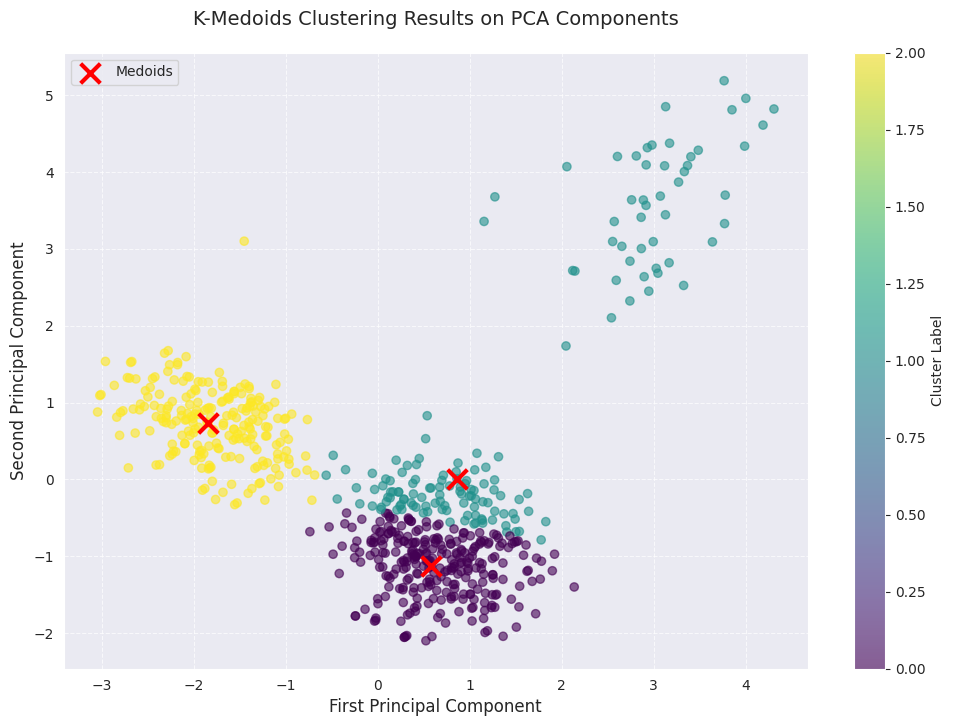

In [ ]:
# 22. Create visualisation of K-Medoids clustering
plt.figure(figsize=(12, 8))                  # Set figure size

# Create scatter plot of clusters
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1],                # Plot first two PCA components
    c=kmedoids_labels,                       # Color points by cluster
    cmap='viridis',                          # Color scheme
    alpha=0.6                                # Point transparency
)

# Add medoid points (cluster centers)
medoids = X_pca[kmedoids.medoid_indices_]    # Get medoid points
plt.scatter(
    medoids[:, 0], medoids[:, 1],           # Plot medoid coordinates
    c='red',                                # Red color for medoids
    marker='x',                             # X marker
    s=200,                                  # Marker size
    linewidth=3,                            # Line width
    label='Medoids'                         # Legend label
)

# Configure plot appearance
plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)
plt.title('K-Medoids Clustering Results on PCA Components',
          fontsize=14, pad=20)

# Add visualisation elements
plt.colorbar(scatter, label='Cluster Label')  # Add color scale
plt.legend()                                  # Add legend
plt.grid(True, linestyle='--', alpha=0.7)    # Add grid
plt.show()

# **Create cluster profiles using the summary statistics and box plots for each label**

**Cluster Profiles**

In [ ]:
# Create cluster profiles and visualisations
# Generate profile summaries for each cluster
print("\nK-Medoids Cluster Profiles:")
for i in range(n_clusters):
    # Get data for current cluster
    cluster_data = df_kmedoids[df_kmedoids['Cluster'] == i]
    size = len(cluster_data)                 # Count samples in cluster
    percentage = (size / len(df_kmedoids)) * 100  # Calculate percentage

    # Print cluster information
    print(f"\nCluster {i}:")
    print(f"Size: {size} customers ({percentage:.2f}%)")
    print("\nSummary Statistics:")
    print(cluster_data[df.columns].describe().round(2))


K-Medoids Cluster Profiles:

Cluster 0:
Size: 280 customers (42.75%)

Summary Statistics:
       Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
count            280.00              280.00             280.00   
mean           26589.29                5.46               3.88   
std            19293.60                1.14               1.01   
min             5000.00                4.00               2.00   
25%            11000.00                4.00               3.00   
50%            18500.00                6.00               4.00   
75%            39000.00                6.00               5.00   
max            75000.00                7.00               5.00   

       Total_visits_online  Total_calls_made  
count               280.00            280.00  
mean                  0.89              1.92  
std                   0.85              1.43  
min                   0.00              0.00  
25%                   0.00              1.00  
50%                   1.00      

**Box Plots**

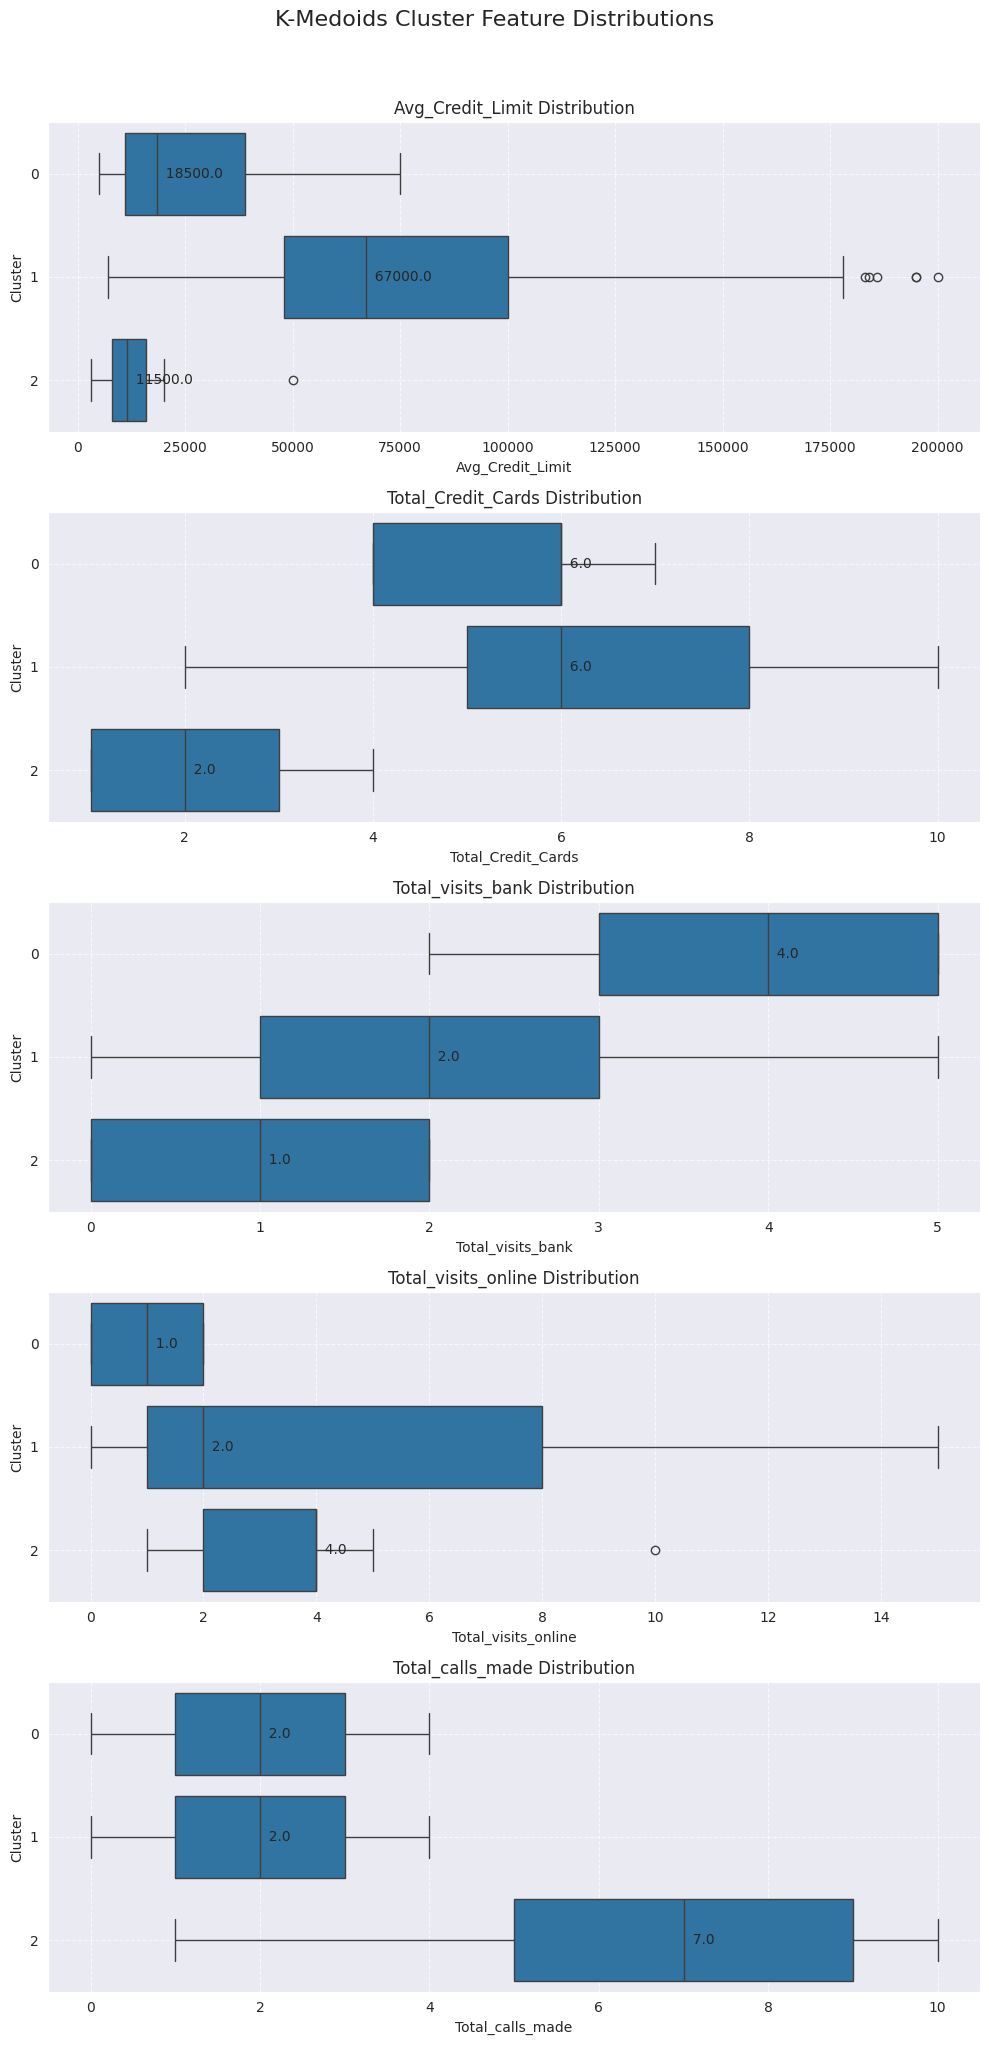

In [ ]:
# Create visualisation function for K-Medoids clusters
def plot_kmedoids_boxplots():
    features = df.columns

    # Set up subplot structure
    fig, axes = plt.subplots(
        len(features), 1,                     # Create vertical subplot for each feature
        figsize=(10, 20)                      # Set figure size
    )
    fig.suptitle('K-Medoids Cluster Feature Distributions',
                fontsize=16, y=1.02)          # Add main title with offset

    # Create box plots for each feature
    for idx, feature in enumerate(features):
        # Create horizontal box plot
        sns.boxplot(
            data=df_kmedoids,                 # Use K-Medoids clustered data
            x=feature,                        # Feature on x-axis
            y='Cluster',                      # Clusters on y-axis
            orient='h',                       # Horizontal orientation
            ax=axes[idx]                      # Assign to specific subplot
        )

        # Configure subplot
        axes[idx].set_title(f'{feature} Distribution')
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel('Cluster')

        # Add grid
        axes[idx].grid(
            True,                             # Enable grid
            linestyle='--',                   # Dashed lines
            alpha=0.7                         # Grid transparency
        )

        # Add median value annotations
        medians = df_kmedoids.groupby('Cluster')[feature].median()
        for i, median in enumerate(medians):
            axes[idx].text(
                median, i,                    # Position at median value
                f'  {median:.1f}',            # Format median value
                verticalalignment='center'     # Center text vertically
            )

    plt.tight_layout()                        # Adjust subplot spacing
    plt.show()

# Generate visualisations
plot_kmedoids_boxplots()

# Observations

## Cluster Size Distribution
* **Cluster 0**: 280 customers (42.75%) - Traditional Banking Segment
* **Cluster 1**: 153 customers (23.36%) - Premium Digital Segment
* **Cluster 2**: 222 customers (33.89%) - Support-Dependent Segment

## Detailed Feature Distribution Analysis

### Average Credit Limit
* **Cluster 0 (Traditional)**
  * Median: ~25,000
  * Moderate spread (IQR: ~11,000-39,000)
  * Few outliers beyond 75,000
* **Cluster 1 (Premium)**
  * Median: ~80,000
  * Large spread (IQR: ~48,000-100,000)
  * Several high-value outliers up to 200,000
* **Cluster 2 (Support-Dependent)**
  * Median: ~12,000
  * Tight spread (IQR: ~8,000-16,000)
  * Few outliers above 50,000

### Total Credit Cards
* **Cluster 0**
  * Median: 6 cards
  * Narrow IQR (4-6 cards)
  * Very few outliers
* **Cluster 1**
  * Median: ~7 cards
  * Wide spread (5-8 cards)
  * Extends up to 10 cards
* **Cluster 2**
  * Median: 2 cards
  * Compact range (1-3 cards)
  * Maximum of 4 cards

### Branch Visit Patterns
* **Cluster 0**
  * Median: 4 visits
  * High concentration between 3-5 visits
  * Clear preference for branch banking
* **Cluster 1**
  * Median: 2 visits
  * Wide spread (1-3 visits)
  * Some outliers up to 5 visits
* **Cluster 2**
  * Median: 1 visit
  * Limited range (0-2 visits)
  * Consistent low usage pattern

### Online Banking Usage
* **Cluster 0**
  * Median: 1 visit
  * Very limited range (0-2 visits)
  * Minimal digital engagement
* **Cluster 1**
  * Median: ~4 visits
  * Extensive spread (1-8 visits)
  * Some outliers up to 15 visits
* **Cluster 2**
  * Median: 4 visits
  * Moderate spread (2-4 visits)
  * Outlier at 10 visits

### Call Center Usage
* **Cluster 0**
  * Median: 2 calls
  * Moderate spread (1-3 calls)
  * Limited support needs
* **Cluster 1**
  * Median: 2 calls
  * Similar pattern to Cluster 0
  * Self-sufficient customers
* **Cluster 2**
  * Median: 7 calls
  * Wide spread (5-9 calls)
  * Heavy support requirements


# **Compare the clusters from K-Means and K-Medoids**

# K-means vs K-medoids Clustering Analysis

## Cluster Size Comparison
<div style="display: inline-block">

| Cluster | K-means | K-medoids | Difference |
|---------|---------|-----------|------------|
| 0 | 386 (58.48%) | 280 (42.75%) | -15.73% |
| 1 | 224 (33.94%) | 153 (23.36%) | -10.58% |
| 2 | 50 (7.58%) | 222 (33.89%) | +26.31% |

</div>


## Cluster Profiles Comparison

### Credit Metrics

#### Average Credit Limit
* **K-means**
  * Cluster 0: 33,782 (mid-range)
  * Cluster 1: 12,174 (low)
  * Cluster 2: 141,040 (high)

* **K-medoids**
  * Cluster 0: 26,589 (mid-range)
  * Cluster 1: 80,340 (high)
  * Cluster 2: 12,126 (low)

#### Total Credit Cards
* **K-means**
  * Cluster 0: 5.52 cards
  * Cluster 1: 2.41 cards
  * Cluster 2: 8.74 cards

* **K-medoids**
  * Cluster 0: 5.46 cards
  * Cluster 1: 6.61 cards
  * Cluster 2: 2.40 cards

### Channel Usage

#### Bank Visits
* **K-means**
  * Cluster 0: 3.49 visits
  * Cluster 1: 0.93 visits
  * Cluster 2: 0.60 visits

* **K-medoids**
  * Cluster 0: 3.88 visits
  * Cluster 1: 1.84 visits
  * Cluster 2: 0.92 visits

#### Online Visits
* **K-means**
  * Cluster 0: 0.98 visits
  * Cluster 1: 3.55 visits
  * Cluster 2: 10.90 visits

* **K-medoids**
  * Cluster 0: 0.89 visits
  * Cluster 1: 4.38 visits
  * Cluster 2: 3.55 visits

## Key Differences

### 1. Cluster Distribution
* K-means shows more extreme segmentation (58.48%, 33.94%, 7.58%)
* K-medoids shows more balanced segments (42.75%, 23.36%, 33.89%)
* K-medoids distributes high-value customers more broadly

### 2. Segment Characteristics
* **K-means**:
  * Clear separation between high/medium/low value customers
  * More extreme differentiation in digital behavior
  * Sharper distinction in channel preferences

* **K-medoids**:
  * More nuanced segmentation
  * Less extreme value separation
  * More gradual channel preference transitions

### 3. Center Selection
* K-means uses computed centroids
* K-medoids uses actual customers as medoids
* Results in different boundary definitions


## **Conclusions and Business Recommendations**

## Executive Summary
Analysis of AllLife Bank's credit card customer base using multiple clustering techniques (K-means, GMM, and K-medoids) consistently identified three distinct customer segments.

The analysis demonstrates extremely stable segmentation patterns, with perfect consistency across different analytical approaches, indicating highly natural and well-defined customer groups.

The segments comprise:

1. A Traditional Banking segment (42.75% of customers) preferring branch visits with moderate credit limits
2. A Premium Digital segment (23.36%) with high credit limits and strong digital engagement
3. A Support-Dependent segment (33.89%) characterised by lower credit limits and high support needs.

This segmentation provides a robust foundation for targeted service delivery, marketing strategies, and resource allocation.

## Key Conclusions

### 1. Customer Segmentation Stability
* Extremely robust segmentation across all clustering methods
* Clear, natural groupings with distinct characteristics
* Highly reliable basis for strategic decisions

### 2. Channel Preferences
* Strong correlation between credit limits and digital adoption
* Inverse relationship between branch visits and online usage
* Clear pattern in support needs across segments

### 3. Value Distribution
* Well-defined credit limit tiers across segments
* Credit card ownership aligns with credit limits
* Service channel preferences correlate with customer value

### 4. Service Patterns
* Distinct support needs by segment
* Clear channel preferences
* Consistent behavioral patterns within segments

## Business Recommendations

### 1. Service Delivery Strategy
* **Traditional Segment (42.75%)**
  * Maintain strong branch presence
  * Introduce digital banking education programs
  * Develop hybrid service model to gradually transition customers
  * Focus on relationship banking

* **Premium Segment (23.36%)**
  * Enhance digital platform capabilities
  * Introduce premium digital-first services
  * Develop exclusive online benefits
  * Create VIP digital support channel

* **Support-Dependent Segment (33.89%)**
  * Implement efficient support systems
  * Develop self-service tools and education
  * Create targeted support reduction programs
  * Focus on digital enablement

### 2. Marketing and Growth Initiatives
* **Traditional Segment**
  * Cross-sell digital products
  * Educational campaigns on digital benefits
  * Relationship-based product bundles
  * Branch-to-digital transition incentives

* **Premium Segment**
  * Premium product development
  * Digital service expansion
  * Loyalty program enhancement
  * Referral program development

* **Support-Dependent Segment**
  * Self-service incentives
  * Digital adoption campaigns
  * Credit limit increase programs
  * Educational content development

### 3. Operational Recommendations
* **Resource Allocation**
  * Optimize branch staffing based on Traditional segment needs
  * Invest in digital infrastructure for Premium segment
  * Streamline support systems for Support-Dependent segment

* **Technology Investment**
  * Enhanced digital banking platform
  * Automated support systems
  * Data analytics capabilities
  * Channel integration tools

* **Staff Training**
  * Segment-specific service protocols
  * Digital banking expertise
  * Cross-channel service delivery
  * Customer migration support

### 4. Risk Management
* **Credit Risk**
  * Segment-specific credit assessment models
  * Behavioral scoring implementation
  * Channel usage-based risk metrics

* **Operational Risk**
  * Channel capacity management
  * Support quality monitoring
  * Digital security enhancement
  * Service continuity planning

### 5. Performance Monitoring
* **KPIs by Segment**
  * Channel usage metrics
  * Support requirement trends
  * Customer satisfaction scores
  * Product adoption rates
  * Profitability metrics


In [ ]:
!jupyter nbconvert --to html '/content/drive/MyDrive/Applied Data Science Program/Main Modules/Elective Project - DataVis/AllLife Bank Customer Segmentation/Final_MQ_Learner_Notebook_USL_Fullcode_Version.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Applied Data Science Program/Main Modules/Elective Project - DataVis/AllLife Bank Customer Segmentation/Final_MQ_Learner_Notebook_USL_Fullcode_Version.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 17 image(s).
[NbConvertApp] Writing 3425557 bytes to /content/drive/MyDrive/Applied Data Science Program/Main Modules/Elective Project - DataVis/AllLife Bank Customer Segmentation/Final_MQ_Learner_Notebook_USL_Fullcode_Version.html
